# **Data-Driven Strategies for Enhancing TransJakarta’s Service and Revenue**

# **1. Introduction**


The **bus rapid transit (BRT) system** in Jakarta, Indonesia, called **TransJakarta**, is an important part of the city's public transportation system. It's a cheap way for millions of people to get around every day because it has a large network. As it grows, understanding how the system works and what kind of people use it becomes increasingly important to improve service delivery and generate more revenue.


The goal of this **exploratory data analysis (EDA)** is to find important findings that will help with making strategic decisions. By delving into the data, we hope to find answers to critical questions that will help TransJakarta enhance customer happiness, operational efficiency, and profitability. The main questions of this analysis include:
- Identifying Crucial Customers and Dividing the Market:
    -  Who are the people who buy the most and spend the most?
    - Can we identify potential partnerships with banks or businesses to offer exclusive deals or benefits?
- Identifying Peak Period:
    - When and what days of the week are the busiest?
    - How is bus use different during the week compared to the weekends or holidays?
- Looking at Places That Are Crowded:
    - Which stations or lines have the most people using them?
    - Are there problems with overcrowding buses?
- Trends in Revenue:
    - What changes about the income over time?
    - Can we identify our revenue funnel from customer segmentation?
- Looking into Models for Weekend Trip Promo and Commuter Pass:
    - Would a weekend promo work for people who take the bus often on the weekend?
    - Would a commuter pass be a viable option given TransJakarta are a popular option for commuters?

By answering these questions and carefully analyzing the data, this EDA will provide valuable insights that can be acted upon. The results will serve as a foundation for building data-driven plans to make the TransJakarta service more effective and profitable.


# **2. Data Preparation: Understanding and Cleaning**

| **Column Name**        | **Description**                                                                 |
|-------------------------|---------------------------------------------------------------------------------|
| `transID`              | Unique transaction ID for every transaction                                     |
| `payCardID`            | Customer's main identifier. The card customers use for entrance and exit        |
| `payCardBank`          | Customer's card bank issuer name                                                |
| `payCardName`          | Customer's name embedded in the card                                            |
| `payCardSex`           | Customer's sex embedded in the card                                             |
| `payCardBirthDate`     | Customer's birth year                                                           |
| `corridorID`           | Corridor ID / Route ID as key for route grouping                                |
| `corridorName`         | Corridor Name / Route Name, containing start and finish for each route          |
| `direction`            | Direction of the route: `0` for Go, `1` for Back                               |
| `tapInStops`           | Tap In (entrance) Stop ID for identifying stop names                            |
| `tapInStopsName`       | Tap In (entrance) Stop Name where customers tap in                              |
| `tapInStopsLat`        | Latitude of Tap In Stops                                                        |
| `tapInStopsLon`        | Longitude of Tap In Stops                                                       |
| `stopStartSeq`         | Sequence of the stops (e.g., 1st stop, 2nd stop, etc.), related to direction    |
| `tapInTime`            | Time of tap in (date and time)                                                  |
| `tapOutStops`          | Tap Out (exit) Stop ID for identifying stop names                               |
| `tapOutStopsName`      | Tap Out (exit) Stop Name where customers tap out                                |
| `tapOutStopsLat`       | Latitude of Tap Out Stops                                                       |
| `tapOutStopsLon`       | Longitude of Tap Out Stops                                                      |
| `stopEndSeq`           | Sequence of the stops (e.g., 1st stop, 2nd stop, etc.), related to direction    |
| `tapOutTime`           | Time of tap out (date and time)                                                 |
| `payAmount`            | Amount paid by customers (some rides are free, some are not)                    |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind


In [2]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('Transjakarta.csv')

In [5]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,Pal Putih,-6.184631,106.84402,7,4/3/2023 5:21,P00253,Tegalan,-6.203101,106.85715,12.0,4/3/2023 6:00,3500.0
1,LGXO740D2N47GZ,4.885330e+15,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,Kemenkes 2,-6.228700,106.83302,13,4/3/2023 5:42,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,4/3/2023 6:40,3500.0
2,DJWR385V2U57TO,4.996230e+15,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,4/3/2023 5:59,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,4/3/2023 6:50,3500.0
3,JTUZ800U7C86EH,6.390990e+11,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,Taman Elok 1,-6.195743,106.93526,23,4/3/2023 5:44,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,4/3/2023 6:28,3500.0
4,VMLO535V7F95NJ,5.709280e+11,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,4/3/2023 6:17,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,4/3/2023 6:57,3500.0


In [6]:
df.shape

(37900, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  float64
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  int64  
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [8]:
#Changing tapin and tapout time into date time
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  float64       
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  int64         
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

In [10]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

<Axes: >

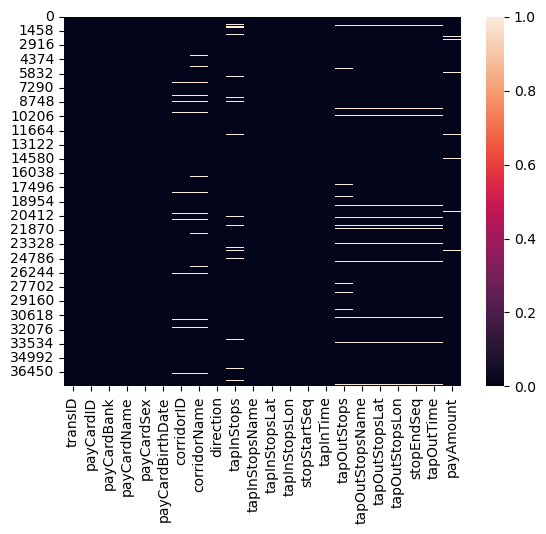

In [11]:
sns.heatmap(df.isna())

In [12]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [ ]:
print('Null items percentage (columns)')
(df.isna().sum()/df.shape[0])*100

Null items percentage (columns)


transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

In [14]:
df.duplicated().sum()

0

There are no duplicates in the data, but there are around 1400-2000 rows of data that has missing values on it.

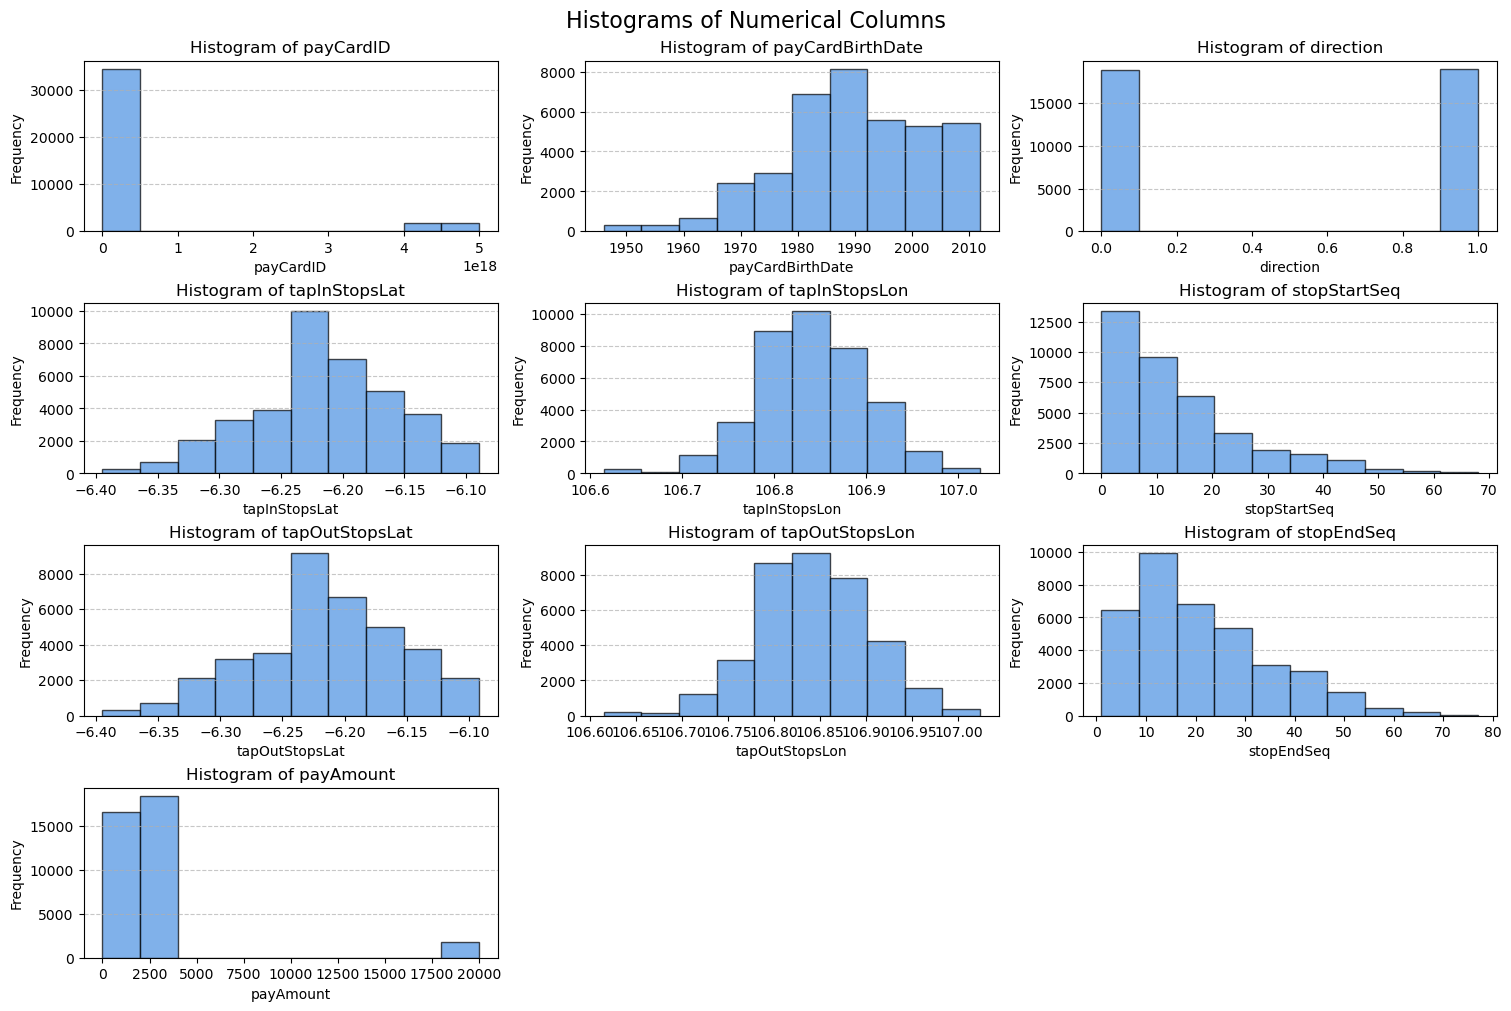

In [15]:
import math
# Assuming `df` is your DataFrame
num_columns = df.select_dtypes(include=['number']).columns  # Select numerical columns
num_cols = len(num_columns)

# Determine grid size
cols = 3  # Fixed number of columns in the subplot grid
rows = math.ceil(num_cols / cols)  # Calculate the required rows

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each histogram
for i, col in enumerate(num_columns):
    axes[i].hist(df[col].dropna(), bins=10, color='#4a90e2', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histogram of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Add an overall title
fig.suptitle('Histograms of Numerical Columns', fontsize=16)

# Display the plot
plt.show()

## Cleaning Corridor ID, corridor name
corridor ID and corridor name are complementary columns, meaning same corridor ID indicates the same route/corridor name. If any corridorID has missing values we can use the 


In [16]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:00,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:00,3500.0
1,LGXO740D2N47GZ,4.885330e+15,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:00,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:00,3500.0
2,DJWR385V2U57TO,4.996230e+15,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:00,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:00,3500.0
3,JTUZ800U7C86EH,6.390990e+11,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:00,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:00,3500.0
4,VMLO535V7F95NJ,5.709280e+11,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:00,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:00,3500.0


In [ ]:
df[['corridorID', 'corridorName','tapInStopsLat', 'tapInStopsLon']].isna().sum()

corridorID       1257
corridorName     1930
tapInStopsLat       0
tapInStopsLon       0
dtype: int64

### using mapping to indicate the corridor ID to its corresponding name

In [18]:
#getting the dict for each route ID and Name
corridorID_map = df.dropna(subset=['corridorID', 'corridorName']).set_index('corridorID')['corridorName'].to_dict() #setting corridorID as key
corridorID_map

{'5': 'Matraman Baru - Ancol',
 '6C': 'Stasiun Tebet - Karet via Patra Kuningan',
 'R1A': 'Pantai Maju - Kota',
 '11D': 'Pulo Gebang - Pulo Gadung 2 via PIK',
 '12': 'Tanjung Priok - Pluit',
 '1T': 'Cibubur - Balai Kota',
 'JAK.18': 'Kalibata - Kuningan',
 'B14': 'Bekasi Barat - Kuningan',
 '1Q': 'Rempoa - Blok M',
 '5M': 'Kampung Melayu - Tanah Abang via Cikini',
 'M7B': 'BKN - Blok M',
 '9A': 'PGC 2 - Grogol 2',
 '4': 'Pulo Gadung 2 - Tosari',
 'JAK.46': 'Pasar Minggu - Jagakarsa',
 'S22': 'Ciputat - Kampung Rambutan',
 '13': 'Ciledug - Tendean',
 '9E': 'Kebayoran Lama - Jelambar',
 'M9': 'Pinang Ranti - Pluit',
 'JAK.88': 'Terminal Tanjung Priok - Ancol Barat',
 'T11': 'Poris Plawad - Bundaran Senayan',
 'JAK.16': 'Cililitan - Condet',
 '6V': 'Ragunan - Gelora Bung Karno',
 '11Q': 'Kampung Melayu - Pulo Gebang via BKT',
 'JAK.02': 'Kampung Melayu - Duren Sawit',
 '11': 'Pulo Gebang - Matraman',
 '1C': 'Pesanggrahan - Blok M',
 '3B': 'Rusun Flamboyan - Cengkareng',
 'M1': 'Blok M - K

In [19]:
#fill name based on corridor ID
df['corridorName'] = df['corridorName'].fillna(df['corridorID'].map(corridorID_map)) # filling corrdiorName using map to give the value of corresponding key (corridorID)
df['corridorName']

0                           Matraman Baru - Ancol
1        Stasiun Tebet - Karet via Patra Kuningan
2                              Pantai Maju - Kota
3             Pulo Gebang - Pulo Gadung 2 via PIK
4                           Tanjung Priok - Pluit
                           ...                   
37895           Ragunan - MH Thamrin via Semanggi
37896                      Pinang Ranti - Pramuka
37897                        Cibubur - Balai Kota
37898                 Tanah Abang - Jembatan Lima
37899                           Ciledug - Tendean
Name: corridorName, Length: 37900, dtype: object

using mapping to indicate the corridor name to its corresponding ID

In [20]:
corridorName_map = df.dropna(subset=['corridorID', 'corridorName']).set_index('corridorName')['corridorID'].to_dict()#setting corridorName as key
corridorName_map

{'Matraman Baru - Ancol': '5',
 'Stasiun Tebet - Karet via Patra Kuningan': '6C',
 'Pantai Maju - Kota': 'R1A',
 'Pulo Gebang - Pulo Gadung 2 via PIK': '11D',
 'Tanjung Priok - Pluit': '12',
 'Cibubur - Balai Kota': '1T',
 'Kalibata - Kuningan': 'JAK.18',
 'Bekasi Barat - Kuningan': 'B14',
 'Rempoa - Blok M': '1Q',
 'Kampung Melayu - Tanah Abang via Cikini': '5M',
 'BKN - Blok M': 'M7B',
 'PGC 2 - Grogol 2': '9A',
 'Pulo Gadung 2 - Tosari': '4',
 'Pasar Minggu - Jagakarsa': 'JAK.46',
 'Ciputat - Kampung Rambutan': 'S22',
 'Ciledug - Tendean': '13',
 'Kebayoran Lama - Jelambar': '9E',
 'Pinang Ranti - Pluit': '9',
 'Terminal Tanjung Priok - Ancol Barat': 'JAK.88',
 'Poris Plawad - Bundaran Senayan': 'T11',
 'Cililitan - Condet': 'JAK.16',
 'Ragunan - Gelora Bung Karno': '6V',
 'Kampung Melayu - Pulo Gebang via BKT': '11Q',
 'Kampung Melayu - Duren Sawit': 'JAK.02',
 'Pulo Gebang - Matraman': '11',
 'Pesanggrahan - Blok M': '1C',
 'Rusun Flamboyan - Cengkareng': '3B',
 'Blok M - Kota': '

In [21]:
df['corridorID'] = df['corridorID'].fillna(df['corridorName'].map(corridorName_map)) # filling corridorID using map to give the value of corresponding key (corridorName)
df['corridorID']

0             5
1            6C
2           R1A
3           11D
4            12
          ...  
37895        6B
37896        9N
37897        1T
37898    JAK.13
37899        13
Name: corridorID, Length: 37900, dtype: object

In [22]:
df[df['corridorID'].isna() | df['corridorName'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
7,XTKE052E5E87LN,3.587340e+15,dki,Darmanto Rajasa,F,1991,NaN,NaN,1,B03416P,SDN Pondok Labu 11,-6.313269,106.80221,2,2023-04-03 06:44:00,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:00,0.0
120,MCWO805A6Q66MX,3.570420e+15,dki,"Gawati Damanik, S.E.",F,2010,NaN,NaN,0,P00109,Matraman Baru,-6.212880,106.86115,8,2023-04-03 06:38:00,P00224,Slamet Riyadi,-6.208533,106.85929,9.0,2023-04-03 07:32:00,3500.0
240,PTDK452M9A71XF,3.423700e+14,emoney,"Kartika Habibi, S.Psi",M,1975,NaN,NaN,0,B04505P,Sbr. Standard Chartered,-6.217407,106.81934,13,2023-04-03 05:13:00,B03396P,Kota Kasablanka,-6.224688,106.84246,20.0,2023-04-03 05:39:00,3500.0
250,OLZA217B5B95DK,4.371940e+18,brizzi,Zelda Laksita,M,2009,NaN,NaN,1,B04576P,Sbr. Univ. Mercu Buana,-6.210273,106.73786,11,2023-04-03 06:24:00,B05009P,Simpang Meruya Ilir 1,-6.196682,106.75517,28.0,2023-04-03 07:13:00,0.0
257,GHEY769K9T55WF,4.281650e+12,online,Zelda Wibowo,M,1989,NaN,NaN,0,B00048P,Aneka PIK Penggilingan,-6.202636,106.92867,16,2023-04-03 05:05:00,B05823P,United Tractors 1,-6.183260,106.93243,28.0,2023-04-03 05:41:00,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37626,WTBE997C8K47UG,4.087480e+18,brizzi,Kezia Hutagalung,F,1993,NaN,NaN,1,B05316P,SMKN 4,-6.141156,106.95555,42,2023-04-15 10:08:00,B02642P,Ps. Malaka Rorotan,-6.139980,106.95493,43.0,2023-04-15 11:02:00,0.0
37689,ZVAU363K8Z72QF,4.235440e+15,dki,Tgk. Tari Wibowo,F,1989,NaN,NaN,1,P00014,Bermis,-6.178203,106.89859,23,2023-04-28 19:01:00,P00192,Pulo Gadung 1,-6.183239,106.90907,24.0,2023-04-28 21:23:00,3500.0
37727,MGBX067C2V69EZ,2.131460e+14,emoney,Ulva Namaga,F,1995,NaN,NaN,1,P00146,Pangeran Jayakarta,-6.137611,106.81792,6,2023-04-16 17:38:00,P00092,Jembatan Merah,-6.146731,106.83427,9.0,2023-04-16 18:14:00,3500.0
37770,RGLG273G3M96TE,4.725640e+18,brizzi,"Murti Simanjuntak, M.Farm",M,1988,NaN,NaN,1,P00076,Gunung Sahari Mangga Dua,-6.136817,106.83237,11,2023-04-16 09:06:00,P00141,Pakin,-6.127982,106.80474,25.0,2023-04-16 11:14:00,3500.0


In [23]:
df.isna().sum(
)

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

## Cleaning TapInStops, TapInStopsName, TapOutStops, TapOutStopsName

In [24]:
df[['tapInStops', 'tapInStopsName','tapOutStops', 'tapOutStopsName']].isna().sum()

tapInStops         1213
tapInStopsName        0
tapOutStops        2289
tapOutStopsName    1344
dtype: int64

### Filling tapIn stops according to its name

In [25]:
tapInStops_map = df.dropna(subset=['tapInStops', 'tapInStopsName']).set_index('tapInStopsName')['tapInStops'].to_dict()#setting tapin stops name as key
tapInStops_map

{'Pal Putih': 'P00142',
 'Kemenkes 2': 'B01963P',
 'Gg. Kunir II': 'B00499P',
 'Taman Elok 1': 'B05587P',
 'Sunter Boulevard Barat': 'P00239',
 'Benhil 3': 'B00127P',
 'Cervino Village': 'B00243P',
 'SDN Pondok Labu 11': 'B03416P',
 'Imperium': 'B00795P',
 'TPU Bungur': 'B05781P',
 'Pegangsaan Timur': 'B05433P',
 'Tendean': 'P00254',
 'Slipi Petamburan Arah Selatan': 'P00281',
 'Pasar Rumput': 'P00159',
 'Gelanggang Remaja Pasar Minggu': 'B00608P',
 'SMK Darussalam': 'B05291P',
 'JORR': 'P00096',
 'Apartemen Simprug Teras': 'B00058P',
 'Jembatan Tiga Arah Utara': 'P00093',
 'Gunung Sahari Mangga Dua Timur': 'B00722P',
 'RS Harapan Kita Arah Utara': 'P00206',
 'Tirtayasa': 'P00259',
 'Masjid Jami At Taqwa 2': 'B02335P',
 'Simpang Pahlawan Revolusi 1': 'B05023P',
 'St. Jatinegara 2': 'P00233',
 'Univ. Moestopo Bintaro': 'B05833P',
 'Jln. Kayu Besar Dalam': 'B06299P',
 'Pantai Maju': 'B06040P',
 'Polda Metro Jaya': 'P00183',
 '18 Office Park': 'B00001P',
 'Phe Tower Kebagusan': 'B02831P',

In [26]:
df['tapInStops'] = df['tapInStops'].fillna(df['tapInStopsName'].map(tapInStops_map)) # filling corridorID using map to give the value of corresponding key (corridorName)
df['tapInStops']

0         P00142
1        B01963P
2        B00499P
3        B05587P
4         P00239
          ...   
37895     P00261
37896     P00064
37897    B02873P
37898    B02505P
37899     P00001
Name: tapInStops, Length: 37900, dtype: object

In [27]:
df['tapInStops'].isna().sum() # There are 34 

34

In [28]:
df[df['tapInStops'].isna()]['tapInStopsName'].value_counts()

tapInStopsName
Simpang Otista III Selatan         2
PPKD Jaktim                        1
Gg. Al Mawaddah Tengah             1
Sbr. SMAN 41                       1
Sisma Medikal                      1
Klinik Sasana Husada               1
Sbr. Koko Semesta                  1
Jln. Veteran 2                     1
Kec. Pondok Gede                   1
Simpang Jln. Kramat Jaya 2         1
Galur                              1
Sbr. Ruko Taman Cemara             1
Sbr. Barito Park                   1
Sbr. Gg. Langgar Kelapa Dua        1
Cipinang Lontar Rusun Polri        1
Menara Cardig                      1
Cipinang                           1
Sbr. Klinik Yadika Petukangan      1
Rusun Pulo Gebang                  1
Sbr. STIE Rawamangun               1
Green Lake City                    1
Pusdiklat Pajak Jln. Sakti IV      1
Term. Muara Angke 2                1
Sbr. Jln. Rawabadung               1
Sbr. Jln. R. Anggun                1
Ponpes Baitul Quran Al Ikhwan 1    1
Nifarro Park           

In [29]:
df[df['tapInStopsName'] == 'Simpang Otista III Selatan']

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
33359,RYDP135P6E23TV,3.490190e+14,emoney,"Hj. Najwa Wahyuni, S.H.",M,1982,JAK.02,Kampung Melayu - Duren Sawit,1,NaN,Simpang Otista III Selatan,-6.231874,106.86803,32,2023-04-15 13:14:00,B05531P,STIS,-6.231063,106.86716,33.0,2023-04-15 14:12:00,0.0
34741,PHIX498E5T94AJ,2.254640e+15,dki,Slamet Hutapea,F,1993,JAK.02,Kampung Melayu - Duren Sawit,1,NaN,Simpang Otista III Selatan,-6.231874,106.86803,32,2023-04-30 15:17:00,B01994P,Klinik Otista,-6.227394,106.86709,35.0,2023-04-30 16:01:00,0.0


The remaining missing values of tapInStops does not have any references for mapping

In [30]:
df[['tapInStops','tapInStopsName']].isna().sum()

tapInStops        34
tapInStopsName     0
dtype: int64

### Filling tapOut stops according to its name

In [31]:
tapOutStops_map = df.dropna(subset=['tapOutStops', 'tapOutStopsName']).set_index('tapOutStopsName')['tapOutStops'].to_dict()#setting tapin stops name as key
tapOutStops_map

{'Tegalan': 'P00253',
 'Sampoerna Strategic': 'B03307P',
 'Simpang Kunir Kemukus': 'B04962P',
 'Raya Penggilingan': 'B03090P',
 'Kali Besar Barat': 'P00098',
 'Grand Sahid': 'B00694P',
 'Jln. Baros': 'B00899P',
 'Kayuringin 2': 'B01853P',
 'Blok M Jalur 3': 'B06578P',
 'Matraman 4': 'B02387P',
 'Mampang Prapatan': 'P00129',
 'Semanggi': 'P00216',
 'Matraman 2': 'P00135',
 'Jln. Gabus Raya': 'B01062P',
 'Pusdiklat Kemenag 1': 'B03032P',
 'Adam Malik': 'P00001',
 'Pasar Kebayoran Lama': 'P00155',
 'Pancoran Tugu Arah Barat': 'P00145',
 'Jln. Ancol Barat 6': 'B05989P',
 'Term. Poris Plawad': 'B05720P',
 'Jln. Mesjid Al Mabruk': 'B01393P',
 'Masjid Agung': 'P00133',
 'SMAN 100': 'B05256P',
 'RS Duren Sawit 2': 'B03135P',
 'Jatinegara RS Premier': 'P00086',
 'Bintaro Park VIew': 'B00147P',
 'Mall Taman Palem 3': 'B02195P',
 'SD Diakonia 1': 'B03322P',
 'Karet Sudirman': 'P00104',
 'Plaza Oleos': 'B02868P',
 'Bundaran Senayan 1': 'B00221P',
 'Kuningan Timur': 'P00121',
 'Sbr. Jembatan Sukamu

In [32]:
df['tapOutStops'] = df['tapOutStops'].fillna(df['tapOutStopsName'].map(tapOutStops_map)) # filling corridorID using map to give the value of corresponding key (corridorName)
df['tapOutStops']

0         P00253
1        B03307P
2        B04962P
3        B03090P
4         P00098
          ...   
37895     P00228
37896     P00179
37897    B00226P
37898    B01787P
37899     P00106
Name: tapOutStops, Length: 37900, dtype: object

In [33]:
df[['tapOutStops','tapOutStopsName']].isna().sum()

tapOutStops        1363
tapOutStopsName    1344
dtype: int64

### Getting CorridorName from Matching tapinStops

In [34]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [35]:
corridorTapIn_map = df.dropna(subset=['corridorName', 'tapInStops']).set_index('tapInStops')['corridorName'].to_dict()#setting tapin stops name as key
corridorTapIn_map

{'P00142': 'Matraman Baru - Ancol',
 'B01963P': 'Bekasi Barat - Kuningan',
 'B00499P': 'JIS - Terminal Muara Angke',
 'B05587P': 'Rusun Rawa Bebek - Kodamar',
 'P00239': 'Sunter Boulevard Barat - Penjaringan',
 'B00127P': 'Stasiun Palmerah - Tosari',
 'B00243P': 'Stasiun Tebet - Karet via Underpass',
 'B00795P': 'Bekasi Barat - Kuningan',
 'B05781P': 'Rempoa - Blok M',
 'B05433P': 'Senen - Lebak Bulus',
 'P00254': 'Puri Beta - Pancoran Barat',
 'P00281': 'Poris Plawad - Bundaran Senayan',
 'P00159': 'Pulo Gadung 2 - Dukuh Atas 2',
 'B00608P': 'Pasar Minggu - Jagakarsa',
 'B05291P': 'Ciputat - Kampung Rambutan',
 'P00096': 'Ciledug - Tendean',
 'B00058P': 'Kebayoran Lama - Jelambar',
 'P00093': 'Pinang Ranti - Pluit',
 'B00722P': 'Terminal Tanjung Priok - Ancol Barat',
 'P00206': 'Poris Plawad - Bundaran Senayan',
 'B02144P': 'Cililitan - Condet',
 'P00259': 'Puri Beta - Ragunan',
 'B02335P': 'Kampung Melayu - Pulo Gebang via BKT',
 'B05023P': 'Kampung Melayu - Duren Sawit',
 'P00233': 

In [36]:
df['corridorName'] = df['corridorName'].fillna(df['tapInStops'].map(corridorTapIn_map)) # filling corridorID using map to give the value of corresponding key (corridorName)
df['corridorName']

0                           Matraman Baru - Ancol
1        Stasiun Tebet - Karet via Patra Kuningan
2                              Pantai Maju - Kota
3             Pulo Gebang - Pulo Gadung 2 via PIK
4                           Tanjung Priok - Pluit
                           ...                   
37895           Ragunan - MH Thamrin via Semanggi
37896                      Pinang Ranti - Pramuka
37897                        Cibubur - Balai Kota
37898                 Tanah Abang - Jembatan Lima
37899                           Ciledug - Tendean
Name: corridorName, Length: 37900, dtype: object

### Refilling corridorID with updated CorridorName

In [37]:
corridorName_map = df.dropna(subset=['corridorID', 'corridorName']).set_index('corridorName')['corridorID'].to_dict()#setting corridorName as key
corridorName_map

{'Matraman Baru - Ancol': '5',
 'Stasiun Tebet - Karet via Patra Kuningan': '6C',
 'Pantai Maju - Kota': 'R1A',
 'Pulo Gebang - Pulo Gadung 2 via PIK': '11D',
 'Tanjung Priok - Pluit': '12',
 'Cibubur - Balai Kota': '1T',
 'Kalibata - Kuningan': 'JAK.18',
 'Bekasi Barat - Kuningan': 'B14',
 'Rempoa - Blok M': '1Q',
 'Kampung Melayu - Tanah Abang via Cikini': '5M',
 'BKN - Blok M': 'M7B',
 'PGC 2 - Grogol 2': '9A',
 'Pulo Gadung 2 - Tosari': '4',
 'Pasar Minggu - Jagakarsa': 'JAK.46',
 'Ciputat - Kampung Rambutan': 'S22',
 'Ciledug - Tendean': '13',
 'Kebayoran Lama - Jelambar': '9E',
 'Pinang Ranti - Pluit': '9',
 'Terminal Tanjung Priok - Ancol Barat': 'JAK.88',
 'Poris Plawad - Bundaran Senayan': 'T11',
 'Cililitan - Condet': 'JAK.16',
 'Ragunan - Gelora Bung Karno': '6V',
 'Kampung Melayu - Pulo Gebang via BKT': '11Q',
 'Kampung Melayu - Duren Sawit': 'JAK.02',
 'Pulo Gebang - Matraman': '11',
 'Pesanggrahan - Blok M': '1C',
 'Rusun Flamboyan - Cengkareng': '3B',
 'Blok M - Kota': '

In [38]:
df['corridorID'] = df['corridorID'].fillna(df['corridorName'].map(corridorName_map)) # filling corridorID using map to give the value of corresponding key (corridorName)
df['corridorID']

0             5
1            6C
2           R1A
3           11D
4            12
          ...  
37895        6B
37896        9N
37897        1T
37898    JAK.13
37899        13
Name: corridorID, Length: 37900, dtype: object

In [39]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

## Cleaning payAmount

the pay amount varies according to what type of bus the customer is using, thus we can use corridorName as a reference
to fill payAmount column.

Price is divided by 3:
- MikroTrans = 0 IDR
- Transjakarta within jakarta = 3500 IDR
- Transjakarta to outside of jakarta (within greater jakarta region) = 20000 IDR



In [40]:
df[df['payAmount'].isna()][['corridorID', 'corridorName', 'payAmount']]

,corridorID,corridorName,payAmount
11,M7B,BKN - Blok M,NaN
76,JAK.48B,Stasiun Tebet - Kampung Melayu,NaN
97,3H,Jelambar - Kota,NaN
169,M7B,BKN - Blok M,NaN
198,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,NaN
...,...,...,...
37661,M7B,BKN - Blok M,NaN
37674,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin,NaN
37741,3H,Jelambar - Kota,NaN
37861,M1H,Tanah Abang - St. Gondangdia,NaN


In [41]:
df['payAmount'].unique()

array([ 3500., 20000.,     0.,    nan])

In [42]:
df['payAmount'].value_counts()

payAmount
3500.0     18503
0.0        16648
20000.0     1742
Name: count, dtype: int64

In [43]:
payAmount0 = df[df['payAmount']==0]['corridorID'].unique()
payAmount0

array(['JAK.18', 'JAK.03', 'JAK.46', 'JAK.88', 'JAK.16', 'JAK.02', '3B',
       'BW9', 'JAK.15', 'JAK.112', 'JAK.43B', 'JAK.42', 'JAK.36',
       'JAK.06', 'JAK.14', '3A', '3C', 'JAK.71', 'JAK.77', 'JAK.44',
       'JAK.19', 'JAK.75', 'JAK.52', 'JAK.37', 'JAK.31', '11M', 'JAK.43C',
       '2F', 'JAK.117', 'JAK.49', 'JAK.20', 'JAK.118', 'JAK.27', '4E',
       'JAK.13', 'JAK.84', '2H', 'JAK.08', 'JAK.23', 'JAK.07', 'JAK.22',
       'JAK.115', 'JAK.21', 'JAK.26', 'JAK.64', 'JAK.47', '12C', 'JAK.01',
       'JAK.120', 'JAK.85', '11N', 'JAK.10', '2E', 'JAK.41', 'JAK.86',
       '9F', '11P', 'JAK.73', 'JAK.32', 'JAK.50', 'JAK.29', 'JAK.45',
       'JAK.110A', 'JAK.51', 'JAK.54', 'JAK.25', 'JAK.30', 'JAK.39',
       'JAK.80', 'JAK.11', 'JAK.17', '11K', '10B', '9', '2B', '1P', '6D',
       '1N', '14', 'M7B', '7A', '11D', 'JAK.58', '8C', 'JAK.34', '1H',
       '10A', 'JAK.72', 'JAK.74', 'JAK.40', 'JAK.60', 'JAK.56', 'JAK.59',
       'JAK.113', 'JAK.04', 'JAK.38', '12F', 'JAK.61', 'JAK.24', '11C

In [44]:
df[df['payAmount']==0]['corridorName'].unique()

array(['Kalibata - Kuningan', 'Lebak Bulus - Andara',
       'Pasar Minggu - Jagakarsa', 'Terminal Tanjung Priok - Ancol Barat',
       'Cililitan - Condet', 'Kampung Melayu - Duren Sawit',
       'Rusun Flamboyan - Cengkareng', 'Monas - Pantai Indah Kapuk',
       'Bulak Turi - Tanjung Priok', 'Terminal Tanah Merah - Pulo Gadung',
       'Tongtek - Tebet Eco Park (TEP) - Cililitan',
       'Kampung Melayu - Pondok Kelapa', 'Cilangkap - Cililitan',
       'Kampung Rambutan - Pondok Gede', 'Tanah Abang - Meruya',
       'Rusun Pesakih - Kalideres', 'Rusun Kapuk Muara - Penjaringan',
       'Kampung Rambutan - Pinang Ranti', 'Tanjung Priok - Jembatan Item',
       'Andara - Stasiun Universitas Pancasila',
       'Pinang Ranti - Kampung Rambutan', 'Cililitan - Kp. Pulo',
       'Terminal Kalideres - Terminal Muara Angke',
       'Cililitan - Condet via Kayu Manis', 'Blok M - Andara',
       'Rusun Rawa Bebek - Bukit Duri',
       'Sarana Jaya - Tebet Eco Park (TEP) - Stasiun Cawang',
    

In [45]:
payAmount3k = df[df['payAmount']==3500]['corridorID'].unique()
payAmount3k

array(['5', '6C', 'R1A', '11D', '12', '1Q', '5M', '9A', '4', 'S22', '13',
       '9E', 'M9', 'T11', '6V', '11Q', '11', '1C', 'M1', '7E', '1P', '7D',
       '6H', '14', 'JIS3', '2', '6N', 'M11', '9N', '7P', '13B', 'M7',
       '12A', '9D', '1', 'M8', 'B21', 'M3', '8K', 'M10', '10D', 'B11',
       '8C', 'M2', '12B', '5D', '7A', '7Q', '1M', '5C', '6Q', '8E', '6M',
       'L13E', '12P', '1F', '13C', '4B', '7C', '2A', '8A', '1E', 'M4',
       '9H', '13D', '5N', '6T', '5F', '3F', '2P', 'S21', 'M12', '1N',
       'S11', '6U', '10', '2B', '10K', '6A', '4F', '6B', '5B', '3', 'M6',
       '8', '6D', 'JAK.28', 'M7B', '7F', 'B13', '6', '2E', '9C', 'D21',
       'JAK.33', '4D', '1K', 'M13', '1A', 'JAK.48A', '1R', '3H', 'D32',
       '4C', '7', '1B', 'S12', 'JAK.23', '8D', '7B', 'JAK.118', '1H',
       'D11', '8M', '12H', '10H', '3E', '9', 'JAK.39', '11K', 'JAK.07',
       '11P', 'JAK.88', '10A', 'JAK.84', 'JAK.52', 'BW9', '2Q', 'JAK.77',
       'M1H', 'JAK.60', '1T', 'JAK.49', 'JAK.30', 'M5', 'JAK.

In [46]:
df[df['payAmount']==3500]['corridorName'].unique()


array(['Matraman Baru - Ancol',
       'Stasiun Tebet - Karet via Patra Kuningan', 'Pantai Maju - Kota',
       'Pulo Gebang - Pulo Gadung 2 via PIK', 'Tanjung Priok - Pluit',
       'Rempoa - Blok M', 'Kampung Melayu - Tanah Abang via Cikini',
       'PGC 2 - Grogol 2', 'Pulo Gadung 2 - Tosari',
       'Ciputat - Kampung Rambutan', 'Ciledug - Tendean',
       'Kebayoran Lama - Jelambar', 'Pinang Ranti - Pluit',
       'Poris Plawad - Bundaran Senayan', 'Ragunan - Gelora Bung Karno',
       'Kampung Melayu - Pulo Gebang via BKT', 'Pulo Gebang - Matraman',
       'Pesanggrahan - Blok M', 'Blok M - Kota',
       'Kampung Rambutan - Ragunan', 'Senen - Blok M',
       'Pancoran - Kampung Rambutan', 'Senen - Lebak Bulus',
       'Jakarta International Stadium - Senen',
       'Harmoni - Jakarta International Stadium', 'Pulo Gadung - Monas',
       'Ragunan - Blok M via Kemang', 'Pulo Gebang - Pulo Gadung 2',
       'Pinang Ranti - Pramuka', 'Pondok Kelapa - BKN',
       'Puri Beta - Pancora

In [47]:
payAmount20k = df[df['payAmount']==20000]['corridorID'].unique()
payAmount20k

array(['1T', 'B14', 'T21', 'D32', 'S31', '1R', '1P', '9D', '7C', 'B13',
       'D31', '1K', '6P', 'S12', '1N'], dtype=object)

In [48]:
payAmount20kName = df[df['payAmount']==20000]['corridorName'].unique()
payAmount20kName

array(['Cibubur - Balai Kota', 'Bekasi Barat - Kuningan',
       'Palem Semi - Bundaran Senayan', 'Cinere - Bundaran Senayan',
       'Bintaro - Fatmawati', 'Senen - Tanah Abang', 'Senen - Blok M',
       'Pasar Minggu - Tanah Abang', 'Cibubur - BKN',
       'Bekasi Barat - Blok M', 'Cinere - Kuningan',
       'Cibubur Junction - Blok M', 'Cibubur - Kuningan',
       'BSD Serpong - Fatmawati', 'Tanah Abang - Blok M'], dtype=object)

We will fill 20k fares from the route name and filling 0 IDR fares by searching JAK in the corridor ID. Then, We will 
the rest of the na with 3500 (flat fee of transjakarta)

In [49]:
df['payAmount'] = np.where(
    df['corridorName'].isin(payAmount20kName) & df['corridorID'].isin(payAmount20k),
    20000,
    df['payAmount']  # Retain the original payAmount if conditions are not met
)

In [50]:
df['payAmount'] = np.where(df['corridorID'].str.contains(r'JAK.', regex=True), 0, df['payAmount'])

In [51]:
df[df['payAmount'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
11,IIEK980X1O23NZ,3.472040e+14,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,1,P00254,Tendean,-6.240213,106.83102,12,2023-04-03 06:22:00,P00129,Mampang Prapatan,-6.242699,106.82572,14.0,2023-04-03 06:50:00,NaN
97,KFYK655N1H73XS,6.590850e+15,dki,Bajragin Najmudin,M,1986,3H,Jelambar - Kota,0,P00087,Jelambar,-6.166548,106.78651,0,2023-04-03 06:03:00,P00138,Museum Fatahillah,-6.133930,106.81209,9.0,2023-04-03 06:35:00,NaN
169,IWEH403G6J82OS,3.042830e+13,bni,Estiawan Hastuti,M,2008,M7B,BKN - Blok M,1,B02114P,Lapangan Blok S,-6.237011,106.81421,6,2023-04-03 05:20:00,B00290P,Dammara,-6.254190,106.83146,18.0,2023-04-03 06:08:00,NaN
227,OHXC601I4F59SY,5.018280e+11,flazz,"Unjani Damanik, S.T.",M,1975,M1H,Tanah Abang - St. Gondangdia,1,B04101P,Sbr. MNC Center,-6.182744,106.83084,10,2023-04-03 05:02:00,B05445P,St. Gondangdia 2,-6.185054,106.83230,11.0,2023-04-03 06:01:00,NaN
311,NRTT780I2X88BF,3.472040e+14,emoney,R.M. Labuh Laksmiwati,F,1984,M7B,BKN - Blok M,0,B01795P,Kalibata City 2,-6.255816,106.85237,7,2023-04-03 16:37:00,P00254,Tendean,-6.240213,106.83102,20.0,2023-04-03 18:36:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37462,HBAX164L8J57XM,4.236400e+18,brizzi,Eman Hutasoit,M,1956,M7B,BKN - Blok M,0,P00254,Tendean,-6.240213,106.83102,20,2023-04-19 19:29:00,P00112,Kejaksaan Agung,-6.240500,106.79844,23.0,2023-04-19 20:58:00,NaN
37508,IXFT051X9U75IO,2.614060e+15,dki,T. Bakidin Sihotang,F,1987,M7B,BKN - Blok M,0,B02062P,Komplek Polri Duren Tiga,-6.254242,106.83148,14,2023-04-19 17:37:00,B05802P,Transvision,-6.240036,106.82842,19.0,2023-04-19 19:18:00,NaN
37661,PPYR040S6J76TM,4.706130e+15,dki,Dt. Galuh Suryono,F,1987,M7B,BKN - Blok M,0,B03195P,RSIA Duren Tiga 1,-6.253592,106.84130,10,2023-04-16 13:52:00,B02877P,PLN Duren Tiga 1,-6.254389,106.83416,13.0,2023-04-16 16:38:00,NaN
37741,DEMB799H8M93RH,5.723120e+11,flazz,Cornelia Haryanti,F,1989,3H,Jelambar - Kota,0,P00072,Glodok,-6.144500,106.81545,7,2023-04-07 13:19:00,P00013,Kota,-6.136790,106.81490,10.0,2023-04-07 14:05:00,NaN


In [52]:
df['payAmount'] = df['payAmount'].fillna(3500)

In [53]:
df.head(10)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:00,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:00,3500.0
1,LGXO740D2N47GZ,4.885330e+15,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:00,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:00,3500.0
2,DJWR385V2U57TO,4.996230e+15,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:00,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:00,3500.0
3,JTUZ800U7C86EH,6.390990e+11,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:00,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:00,3500.0
4,VMLO535V7F95NJ,5.709280e+11,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:00,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:00,3500.0
5,DDES630K2F80KC,2.251410e+15,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0,B00127P,Benhil 3,-6.216010,106.81632,3,2023-04-03 05:08:00,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:00,20000.0
6,HEMW326B9N91TV,2.131560e+14,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0,B00243P,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:00,NaN,NaN,NaN,NaN,NaN,NaT,0.0
7,XTKE052E5E87LN,3.587340e+15,dki,Darmanto Rajasa,F,1991,JAK.03,Lebak Bulus - Andara,1,B03416P,SDN Pondok Labu 11,-6.313269,106.80221,2,2023-04-03 06:44:00,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:00,0.0
8,OIHS248V7S72EB,6.510010e+15,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1,B00795P,Imperium,-6.210363,106.83059,1,2023-04-03 06:01:00,B01853P,Kayuringin 2,-6.245948,106.99247,16.0,2023-04-03 06:51:00,20000.0
9,ERXO372B2H63RB,3.580400e+15,dki,"T. Dadap Pradana, M.Ak",M,2004,1Q,Rempoa - Blok M,0,B05781P,TPU Bungur,-6.247208,106.77889,15,2023-04-03 05:57:00,B06578P,Blok M Jalur 3,-6.243426,106.80188,24.0,2023-04-03 06:51:00,3500.0


In [54]:
df['payAmount'].value_counts()

payAmount
3500.0     18168
0.0        17088
20000.0     2644
Name: count, dtype: int64

## Final clean

We will be dropping remaining rows since there are columns in certain rows that cant be referenced to other columns or is missing completly at random. 

In [55]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID            33
corridorName          33
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
dtype: int64

In [56]:
df_cleaned = df.dropna(subset=['corridorID', 'corridorName', 'tapInStops',
                                'tapOutStops', 'tapOutStopsName', 
                                'tapOutStopsLat', 'tapOutStopsLon', 
                                'stopEndSeq', 'tapOutTime'])

In [57]:
rows_deleted = df.shape[0] - df_cleaned.shape[0]
rows_deleted_pct = (rows_deleted/df.shape[0])*100

print(f"Number of rows deleted: {rows_deleted} ({round(rows_deleted_pct,2)}%)")

Number of rows deleted: 1426 (3.76%)


We deleted 1426 (3.76%) rows

In [58]:
df_cleaned.to_csv('Transjakarta_clean.csv')

# **3. Data Analysis**
- Data visualization
- Insight

In [59]:
df = df_cleaned

In [60]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:00,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:00,3500.0
1,LGXO740D2N47GZ,4.885330e+15,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:00,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:00,3500.0
2,DJWR385V2U57TO,4.996230e+15,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:00,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:00,3500.0
3,JTUZ800U7C86EH,6.390990e+11,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:00,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:00,3500.0
4,VMLO535V7F95NJ,5.709280e+11,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:00,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:00,3500.0


## Customer Profile
- Exploring customer data by age range, bank used, and gender

### Age Profile

In [61]:
#Making Age column
df['age'] = 2024 - df['payCardBirthDate']
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:00,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:00,3500.0,16
1,LGXO740D2N47GZ,4.885330e+15,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:00,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:00,3500.0,27
2,DJWR385V2U57TO,4.996230e+15,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:00,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:00,3500.0,32
3,JTUZ800U7C86EH,6.390990e+11,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:00,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:00,3500.0,46
4,VMLO535V7F95NJ,5.709280e+11,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:00,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:00,3500.0,42


In [62]:
df_u = df.groupby('payCardID').first().reset_index()

In [63]:
df_u['payCardID'].value_counts()

payCardID
6.040368e+10    1
4.174060e+15    1
4.224450e+15    1
4.219640e+15    1
4.211440e+15    1
               ..
3.426850e+14    1
3.426810e+14    1
3.425430e+14    1
3.425330e+14    1
4.997690e+18    1
Name: count, Length: 1862, dtype: int64

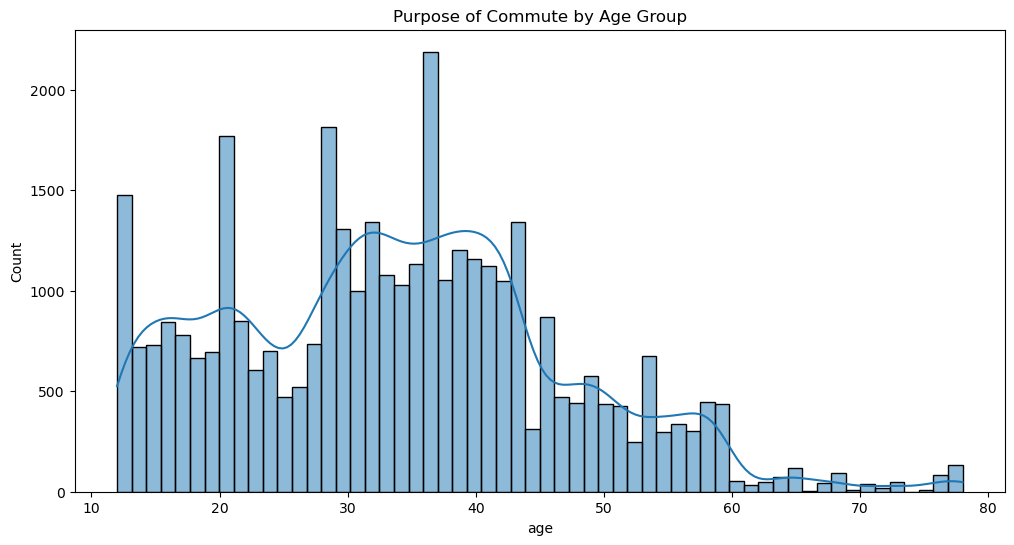

In [64]:
# Distribution of Age
plt.figure(figsize=(12,6))

sns.histplot(df['age'], kde= True)

plt.title('Purpose of Commute by Age Group')
# Show the plot
plt.show()

The age distribution of bus customers reveals that the majority are in their **20s and 30s**, indicating a strong reliance on public transport for **commuting**. 

In [65]:
print(df['age'].min(), df['age'].max())

12 78


Categorizing customer by age into commuting behaviours, and generation

In [66]:
def categorize_generation(age):
    if 12 <= age <= 27:
        return 'Gen Z'
    elif 28 <= age <= 43:
        return 'Millennials'
    elif 44 <= age <= 58:
        return 'Gen X'
    elif 59 <= age <= 77:
        return 'Boomers'
    elif 78 <= age:
        return 'Silent Generation'
    else:
        return 'Out of Range'

Assuming:

- Work Commuters (25–44 years): Typically the most active workforce age group.
- School Commuters (12–17 years): Students in secondary education.
- College/Entry-Level (18–24 years): Students or early-career professionals.
- Leisure Commuters (65+ years): Likely retired individuals using buses for leisure or errands.
- Occasional Commuters (45–64 years): Could represent part-time workers, or infrequent riders.

These are generalizations and might not perfectly match real case scenarios.

In [67]:
def categorize_commute_type(age):
    if 12 <= age <= 17:
        return 'School Commuter'
    elif 18 <= age <= 24:
        return 'College/Entry-Level Commuter'
    elif 25 <= age <= 44:
        return 'Work Commuter'
    elif 45 <= age <= 64:
        return 'Occasional Commuter'
    elif age >= 65:
        return 'Leisure Commuter'
    else:
        return 'Out of Range'

In [68]:
df['generation'] = df['age'].apply(categorize_generation)
df_u['generation'] = df_u['age'].apply(categorize_generation)

In [69]:
df_u['commute_type'] = df_u['age'].apply(categorize_commute_type)
df['commute_type'] = df['age'].apply(categorize_commute_type)

In [70]:
commute_type_counts = pd.pivot_table(df_u,
                                     index='commute_type',
                                     values='age',
                                     aggfunc='count').rename(columns={'age':'count'})
        
commute_type_counts= commute_type_counts.rename(index =
{'College/Entry-Level Commuter': 'College/Entry-Level Commuter (18-24yo)' , 
'Leisure Commuter' :'Leisure Commuter (above 65yo)',
'Occasional Commuter' : 'Occasional Commuter (45-64yo)', 
'School Commuter': 'School Commuter (12-17yo)', 
'Work Commuter' : 'Work Commuter (25-44yo)'})

In [71]:
commute_type_counts

,count
commute_type,
College/Entry-Level Commuter (18-24yo),265
Leisure Commuter (above 65yo),32
Occasional Commuter (45-64yo),322
School Commuter (12-17yo),231
Work Commuter (25-44yo),1012


In [72]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [73]:
def pie_chart_demography(data, title):
    plt.figure(figsize=(8, 8))
    explode = [0.1 if i == data['count'].idxmax() else 0 for i in data.index]

    plt.pie(
        data['count'], 
        labels=data.index, 
        startangle=140, 
        colors=colors, 
        explode=explode, 
        autopct=lambda pct: f'{pct:.1f}%' if pct >= 1.5 else '',
        wedgeprops={'edgecolor': 'black'}
    )

    # Add title
    plt.title(title, fontsize=16)
    plt.axis('equal')
    # Show the plot
    plt.show()

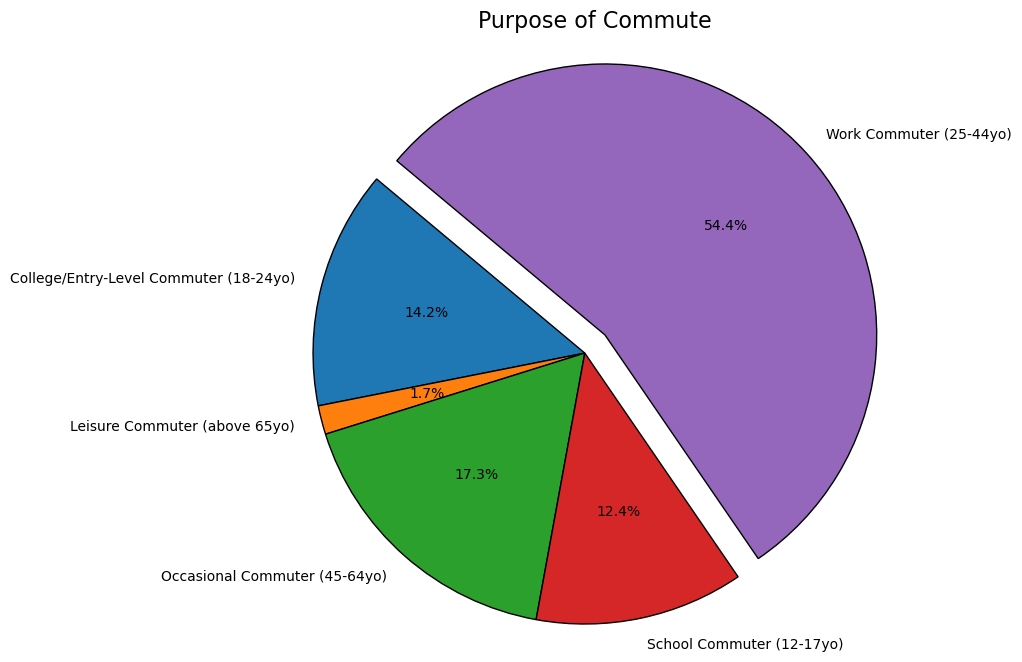

In [74]:
pie_chart_demography(commute_type_counts,'Purpose of Commute')

- The largest group of bus commuters are **Work Commuters (25–44 years old)**, comprising **54.5%** of the total. This suggests that buses are a primary mode of transport for working professionals in this age range.  
- Other notable groups include **Occasional Commuters (45–64 years)** at **16.9%** and **College/Entry-Level Commuters (18–24 years)** at **14.5%**.  
- **Leisure Commuters (above 65 years)** and **School Commuters (12–17 years)** are the smallest groups, indicating limited bus use by these age groups.  


In [75]:
generation_counts = pd.pivot_table(df_u,
                                     index='generation',
                                     values='age',
                                     aggfunc='count').rename(columns={'age':'count'})
        
generation_counts

,count
generation,
Boomers,67
Gen X,305
Gen Z,590
Millennials,897
Silent Generation,3


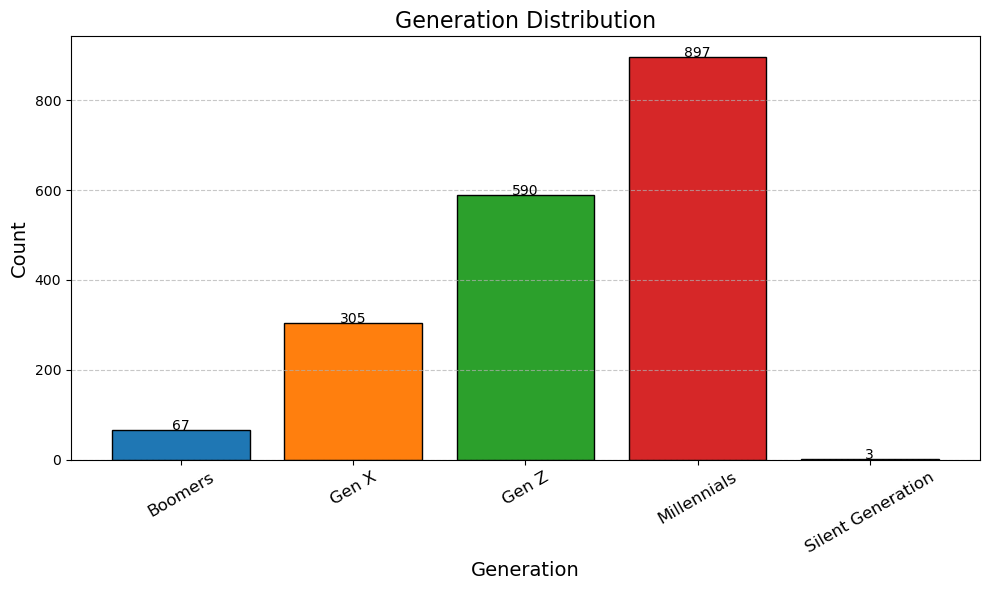

In [76]:
# Bar plot for generation distribution
plt.figure(figsize=(10, 6))
plt.bar(generation_counts.index, generation_counts['count'], color=colors, edgecolor='black')

# Add value labels above bars
for i, value in enumerate(generation_counts['count']):
    plt.text(i, value, str(value), ha='center', fontsize=10)

# Adjust x-axis labels
plt.xticks(rotation=30, fontsize=12)

# Add title and labels with larger font size
plt.title('Generation Distribution', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

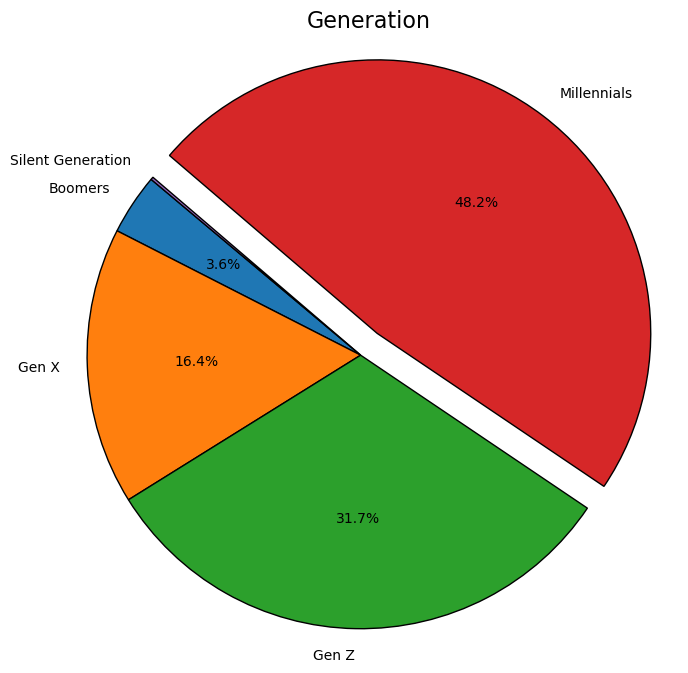

In [77]:
pie_chart_demography(generation_counts,'Generation')

- Millennials form the majority, representing 897 individuals, highlighting their dominance in the population or sampled dataset.
- Generation Z follows with 590 individuals, and Gen X accounts for 305 individuals.
- Baby Boomers and the Silent Generation are the smallest groups, suggesting either a smaller population size or lesser engagement in the surveyed context.

In [78]:
#Create age bin (by 10 years)
age_bins = [12, 22, 32, 42, 52, 62, 72, 80]
custom_labels_bins = ['12–21', '22–31', '32–41', '42–51', '52–61', '62–71', '71-80']  
df['age_group'] = pd.cut(df['age'], bins=age_bins, right=False, labels=custom_labels_bins)
df_u['age_group'] = df['age_group']

In [79]:
age_counts = pd.pivot_table(df_u,
                                     index='age_group',
                                     values='age',
                                     aggfunc='count').rename(columns={'age':'count'})
age_counts

C:\Users\User\AppData\Local\Temp\ipykernel_18544\2340485346.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_counts = pd.pivot_table(df_u,


,count
age_group,
12–21,383
22–31,398
32–41,558
42–51,286
52–61,127
62–71,27
71-80,6


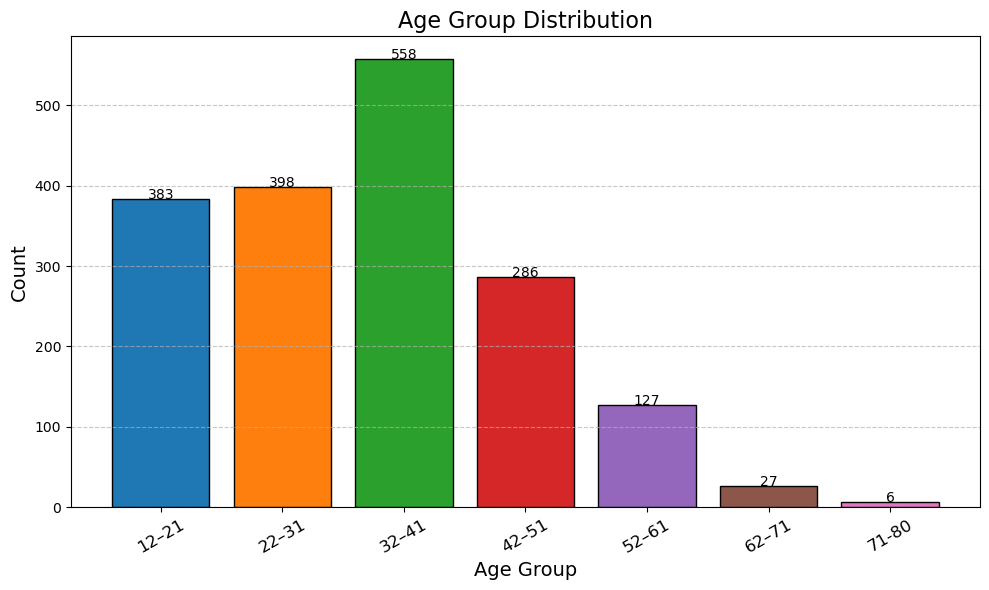

In [80]:
# Bar plot for generation distribution
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts['count'], color=colors, edgecolor='black')

# Add value labels above bars
for i, value in enumerate(age_counts['count']):
    plt.text(i, value , str(value), ha='center', fontsize=10)

# Adjust x-axis labels
plt.xticks(rotation=30, fontsize=12)

# Add title and labels with larger font size
plt.title('Age Group Distribution', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

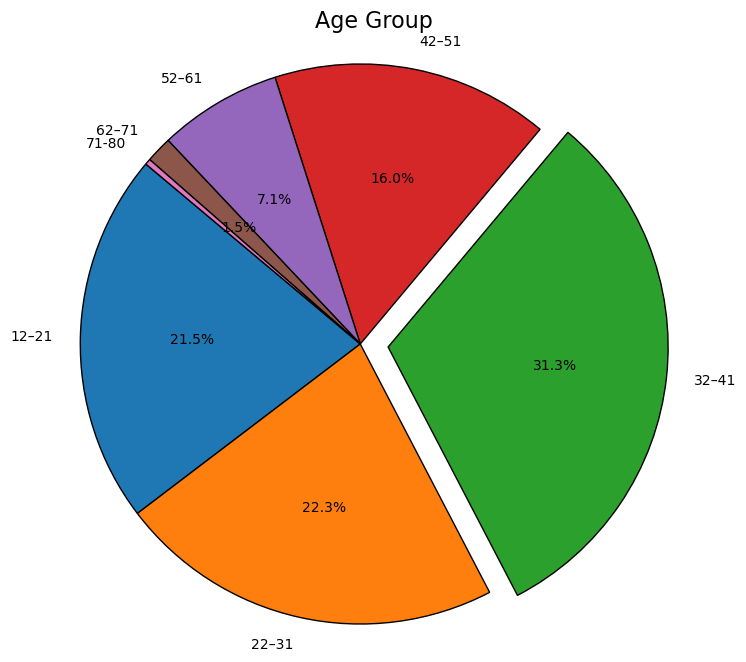

In [81]:
pie_chart_demography(age_counts,'Age Group')

Age Group Analysis

The population is divided into several age groups, each representing varying percentages and counts:

- **12-21 years**:  
  - Representing **21.5%** of the population, with **383 individuals** in this age group.  

- **22-31 years**:  
  - Representing **22.3%** of the population, with **398 individuals** in this age group.  

- **32-41 years**:  
  - The largest group, accounting for **31.3%** of the population, with **558 individuals**.  

- **42-51 years**:  
  - Representing **16.0%** of the population, with **286 individuals** in this age group.  

- **52-61 years**:  
  - Representing **7.1%** of the population, with **127 individuals** in this age group.  

- **62-71 years**:  
  - Representing **1.5%** of the population, with **27 individuals** in this age group.  

- **71-80 years**:  
  - The smallest group, accounting for **0.3%** of the population, with **6 individuals**.  


- Similiarly to previous finding, we can find the majority of the customers' age group in the 32-41 range
- Followed by a younger demography in the 22 - 31 range.

### Gender Profile

In [82]:
df.head(1)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,generation,commute_type,age_group
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:00,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:00,3500.0,16,Gen Z,School Commuter,12–21


In [83]:
df['payCardSex'] = df['payCardSex'].replace({'M': 'Male', 'F': 'Female'})
df_u['payCardSex'] = df_u['payCardSex'].replace({'M': 'Male', 'F': 'Female'})

In [84]:
gender_counts = pd.pivot_table(df_u,
                            index='payCardSex',
                            values='age',
                            aggfunc='count').rename(index = {'payCardSex':'gender'}, columns={'age':'count'})
gender_counts

,count
payCardSex,
Female,977
Male,885


In [85]:
gender_colors = ['#ff9999', '#66b3ff']

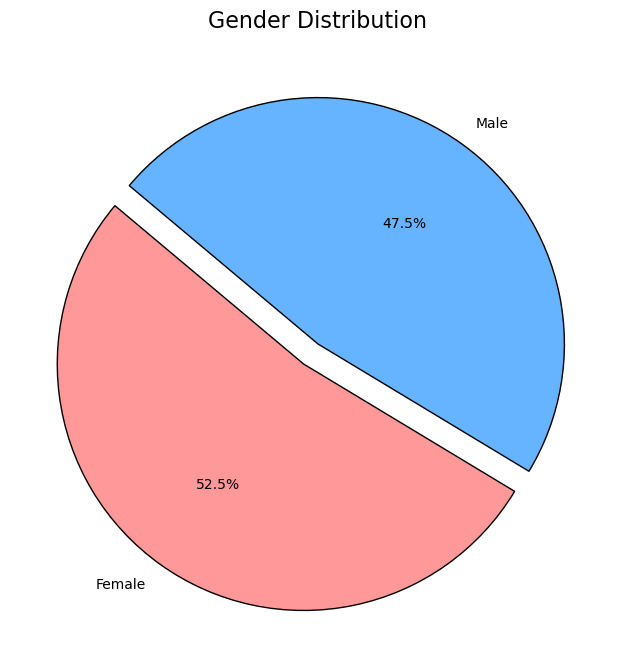

In [86]:
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts['count'], 
    labels=gender_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=gender_colors,
    explode = (0.1,0),
    wedgeprops={'edgecolor': 'black'}
)

# Add a title
plt.title('Gender Distribution', fontsize=16)

# Display the chart
plt.show()

The **gender distribution pie chart** illustrates a slight majority of female consumers, comprising **52.5%** of the total population, while males account for **47.5%**. This indicates a **predominantly female demographic**, suggesting that marketing strategies should be tailored to appeal to this group. The balance in gender representation highlights the importance of considering both segments in outreach efforts, but the **female majority** may present unique opportunities for targeted campaigns and product offerings that resonate with their preferences and needs.

#### Gender Pyramid

In [87]:
gender_gen_pyramid = df_u.groupby(['generation', 'payCardSex']).size().unstack(fill_value=0).reindex(['Gen Z', 'Millennials', 'Gen X', 'Boomers', 'Silent Generation'])
gender_gen_pyramid

payCardSex,Female,Male
generation,,
Gen Z,353,237
Millennials,521,376
Gen X,86,219
Boomers,17,50
Silent Generation,0,3


In [88]:
#Create age bin (by 10 years)
age_bins = [12, 22, 32, 42, 52, 62, 72, 80]
custom_labels_bins = ['12–21', '22–31', '32–41', '42–51', '52–61', '62–71', '71-80']  
df['age_group'] = pd.cut(df['age'], bins=age_bins, right=False, labels=custom_labels_bins)
df_u['age_group'] = df['age_group']

In [89]:
gender_pyramid = df_u.groupby(['age_group', 'payCardSex']).size().unstack(fill_value=0).sort_index()
gender_pyramid

C:\Users\User\AppData\Local\Temp\ipykernel_18544\847809567.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_pyramid = df_u.groupby(['age_group', 'payCardSex']).size().unstack(fill_value=0).sort_index()


payCardSex,Female,Male
age_group,,
12–21,201,182
22–31,216,182
32–41,293,265
42–51,156,130
52–61,66,61
62–71,12,15
71-80,2,4


In [90]:
def plot_gender_pyramid(data, labels, title, xlabel, ylabel,ax ):
    # Plot Male (negative for pyramid shape)
    ax.barh(data.index.astype(str), -data['Male'], color='#4a90e2', label='Male')
    ax.barh(data.index.astype(str), data['Female'], color='#f78da7', label='Female')

    # Title and labels
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    # Custom y-tick labels
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels)

    # Annotate bars
    for index, value in enumerate(data['Male']):
        ax.text(-value - 5, index, str(value), va='center', ha='right', fontsize=9, color='black')
    for index, value in enumerate(data['Female']):
        ax.text(value + 5, index, str(value), va='center', ha='left', fontsize=9, color='black')

    

    # Add legend
    ax.legend(loc='upper right')

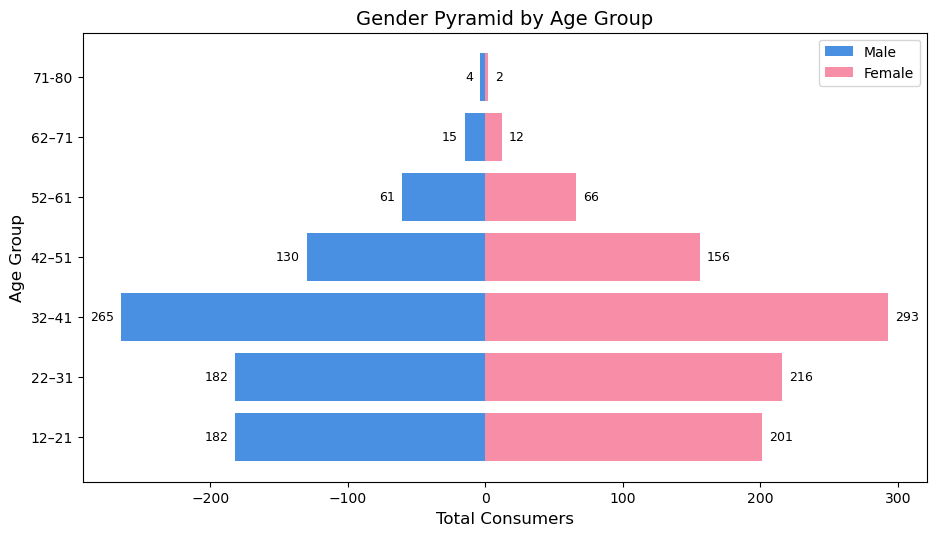

In [91]:
plt.figure(figsize=(10, 6))

plot_gender_pyramid(
    data=gender_pyramid,
    labels=custom_labels_bins,
    title='Gender Pyramid by Age Group',
    xlabel='Total Consumers',
    ylabel='Age Group',
    ax=plt.gca()
)

plt.tight_layout(pad=3)
plt.show()

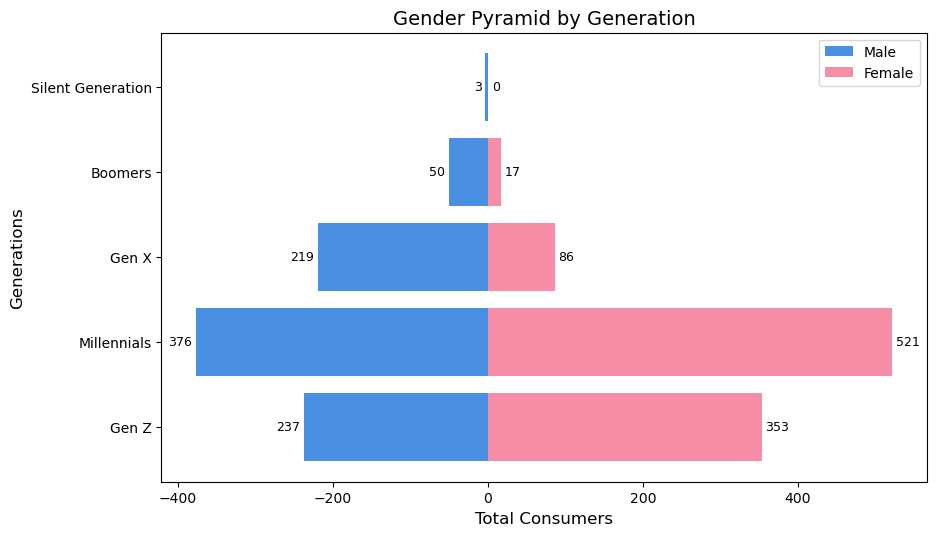

In [92]:
plt.figure(figsize=(10, 6))


plot_gender_pyramid(
    data=gender_gen_pyramid,
    labels=gender_gen_pyramid.index,
    title='Gender Pyramid by Generation',
    xlabel='Total Consumers',
    ylabel='Generations',
    ax=plt.gca()
)

plt.tight_layout(pad=3)
plt.show()

In the generational analysis, **Millennials represent the largest consumer group**, highlighting their dominant market presence. **Gen Z follows closely**, with a notable female majority as well. The **Silent Generation shows the least engagement**, particularly among males. Overall, these insights suggest that **female consumers are more prevalent across most age groups and generations**, particularly among Millennials and Gen Z, indicating a potential focus area for targeted marketing strategies.

The gender pyramid by age bins reveals a significant gender disparity across various age groups. The **32-41 age group has the highest total consumers**, with **293 females compared to 265 males**, indicating a strong female presence in this demographic. The trend continues in the younger age brackets (12-21 and 22-31), where **females consistently outnumber males**.

### Payment method profile

In [93]:
df.head(1)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,generation,commute_type,age_group
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:00,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:00,3500.0,16,Gen Z,School Commuter,12–21


In [94]:
bank_counts = pd.pivot_table(df_u,
                            index='payCardBank',
                            values='age',
                            aggfunc='count').rename(index = {'payCardSex':'gender'}, columns={'age':'count'})
bank_counts

,count
payCardBank,
bni,153
brizzi,163
dki,935
emoney,295
flazz,166
online,150


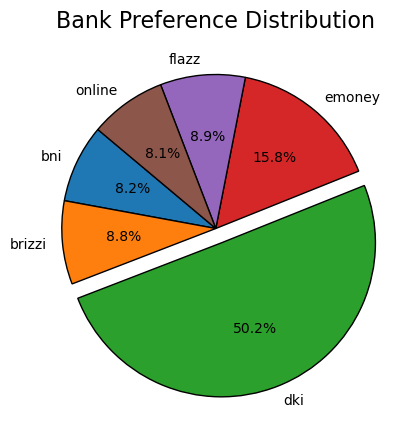

In [95]:
plt.figure(figsize=(5, 5))
plt.pie(
    bank_counts['count'], 
    labels=bank_counts.index, 
    autopct='%1.1f%%', 
    startangle=140,
    explode=(0,0, 0.1,0,0,0),
    wedgeprops={'edgecolor': 'black'}
    )

# Add a title
plt.title('Bank Preference Distribution', fontsize=16)

# Display the chart
plt.show()

- Bank DKI seems to be the preferred option for payment method **having 50% of the customer prefrence**
- Other payment method are distributed more evenly amongst the options


#### Breakdown by generation

In [96]:
# Create the pivot table  
bank_gen_counts = pd.pivot_table(df_u,  
                                  index=['payCardBank','generation'],  
                                  values=['age'],  
                                  aggfunc='count').rename(columns={'age': 'count'}).reset_index()  

In [97]:
df.groupby('generation').size()

generation
Boomers               1121
Gen X                 5839
Gen Z                11572
Millennials          17826
Silent Generation      116
dtype: int64

In [98]:
total_counts = bank_gen_counts.groupby('generation')['count'].transform('sum')  
total_counts

0      67
1     305
2     590
3     897
4      67
5     305
6     590
7     897
8       3
9      67
10    305
11    590
12    897
13      3
14     67
15    305
16    590
17    897
18     67
19    305
20    590
21    897
22     67
23    305
24    590
25    897
Name: count, dtype: int64

In [99]:
bank_gen_counts['percentage'] = bank_gen_counts['count'] / total_counts  

bank_gen_counts

,payCardBank,generation,count,percentage
0,bni,Boomers,6,0.089552
1,bni,Gen X,20,0.065574
2,bni,Gen Z,49,0.083051
3,bni,Millennials,78,0.086957
4,brizzi,Boomers,1,0.014925
5,brizzi,Gen X,30,0.098361
6,brizzi,Gen Z,48,0.081356
7,brizzi,Millennials,83,0.092531
8,brizzi,Silent Generation,1,0.333333
9,dki,Boomers,40,0.597015


In [100]:
# Create a MultiIndex DataFrame  
stacked_data = bank_gen_counts.pivot(index='generation', columns='payCardBank', values='percentage').fillna(0)
stacked_data

payCardBank,bni,brizzi,dki,emoney,flazz,online
generation,,,,,,
Boomers,0.089552,0.014925,0.597015,0.074627,0.149254,0.074627
Gen X,0.065574,0.098361,0.504918,0.173770,0.065574,0.091803
Gen Z,0.083051,0.081356,0.510169,0.179661,0.083051,0.062712
Millennials,0.086957,0.092531,0.488294,0.146042,0.096990,0.089186
Silent Generation,0.000000,0.333333,0.666667,0.000000,0.000000,0.000000


In [101]:
stacked_data['bni'].iloc[2]

0.08305084745762711

In [102]:
stacked_data.columns

Index(['bni', 'brizzi', 'dki', 'emoney', 'flazz', 'online'], dtype='object', name='payCardBank')

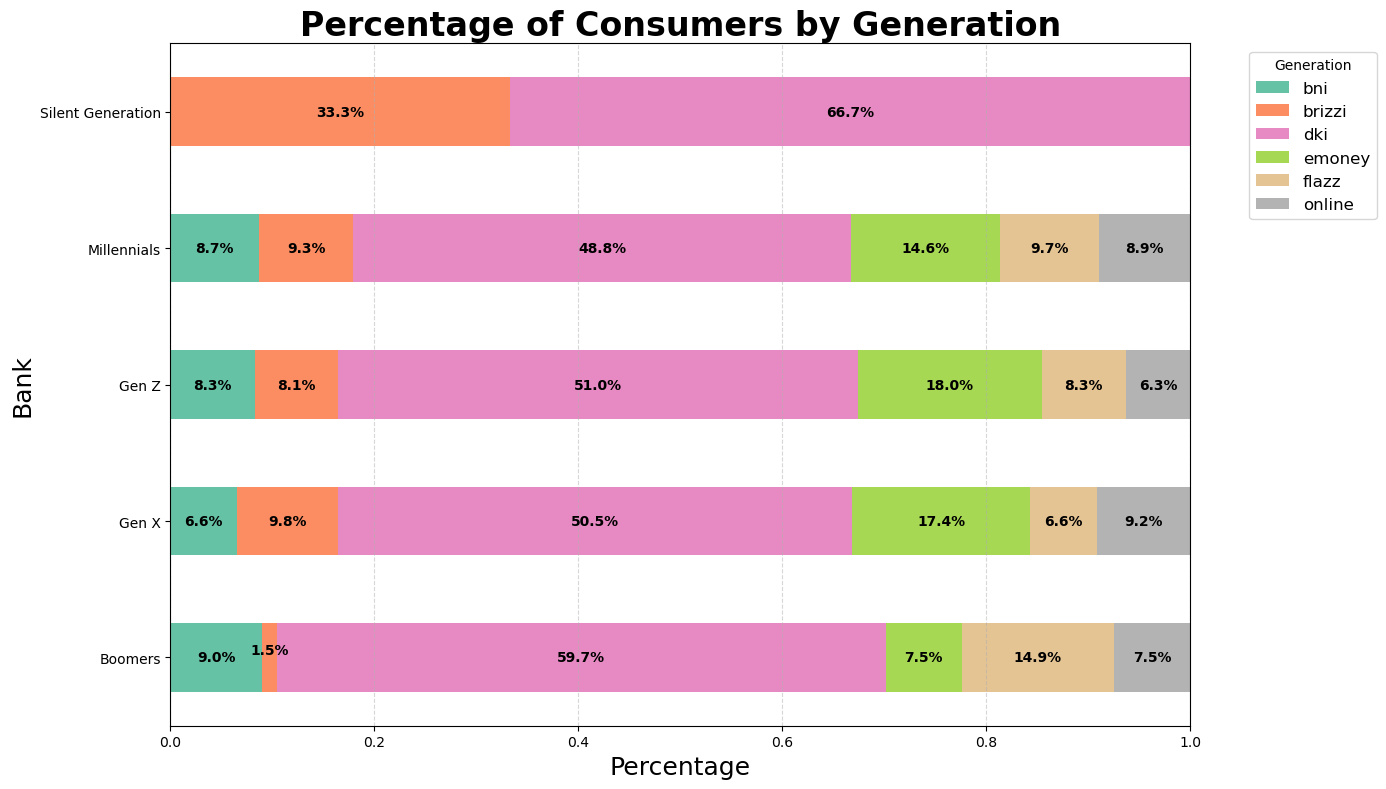

In [103]:


# Assuming stacked_data is already defined as a DataFrame
ax = stacked_data.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='Set2')

# Add titles and labels with improved font sizes
plt.title('Percentage of Consumers by Generation', fontsize=24, fontweight='bold')
plt.xlabel('Percentage', fontsize=18)
plt.ylabel('Bank', fontsize=18)
plt.legend(title='Generation', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xlim(0, 1)  # Set x-axis limits to show proportions clearly

# Add grid lines with lighter style
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Annotate the bars with percentage values
for i in range(len(stacked_data)):
    total = 0
    for bank in stacked_data.columns:
        value = stacked_data[bank].iloc[i]
        percentage = value * 100  # Convert to percentage
        
        if percentage >= 3:  # Show if percentage is 3 or higher
            ax.text(total + value / 2, i, f'{percentage:.1f}%', ha='center', va='center', fontsize=10, color='black', fontweight='bold')
        elif percentage > 0:  # Show if percentage is greater than 0 but less than 3
            ax.text(total + value / 2, i, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
        
        total += value

plt.tight_layout()

# Show the plot
plt.show()


 Percentage of Consumers by Generation

- **Silent Generation**:  
  - **66.7%** use **eMoney** (traditional methods like DKI).  
  - **33.3%** use **Brizzi**, showing reliance on conventional banking methods.  

- **Millennials**:  
  - **48.8%** use **eMoney**, indicating adaptability to digital solutions.  
  - **14.6%** opt for **Flaazz**, while **9.7%** choose **Online Banking**.  

- **Gen Z**:  
  - **51.0%** use **eMoney**, showing a significant digital preference.  
  - **18.0%** use **Flaazz**, with smaller percentages for **Brizzi** and **BNI**.  

- **Gen X**:  
  - **50.5%** use **eMoney**, signifying a balance between traditional and digital banking.  
  - **17.4%** use **Flaazz**, while **9.8%** lean toward **Brizzi**.  

- **Boomers**:  
  - **59.7%** use **eMoney**, reflecting a continued preference for traditional banking.  
  - **14.9%** use **Flaazz**, with minimal engagement in newer solutions like **Online Banking**.


## Time Analysis

In [104]:
df.head(1)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,generation,commute_type,age_group
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:00,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:00,3500.0,16,Gen Z,School Commuter,12–21


In [105]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age
count,3.647400e+04,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474,36474.000000,36474.000000,36474.000000,36474,36474.000000,36474.000000
mean,4.239530e+17,1990.126693,0.500356,-6.214843,106.841524,13.554011,2023-04-16 07:52:30.082250240,-6.214646,106.841225,21.201788,2023-04-16 09:04:37.831879936,3077.671766,33.873307
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:00,-6.394973,106.614730,1.000000,2023-04-01 07:27:00,0.000000,12.000000
25%,1.800410e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,2023-04-10 08:59:15,-6.247225,106.801750,11.000000,2023-04-10 10:15:15,0.000000,23.000000
50%,3.507820e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,2023-04-16 17:35:30,-6.214718,106.834515,18.000000,2023-04-16 18:55:30,3500.000000,34.000000
75%,4.693230e+15,2001.000000,1.000000,-6.175579,106.882270,19.000000,2023-04-21 21:36:00,-6.174736,106.883030,29.000000,2023-04-21 23:02:30,3500.000000,42.000000
max,4.997690e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,2023-04-30 21:51:00,-6.091746,107.023660,77.000000,2023-04-30 23:23:00,20000.000000,78.000000
std,1.320162e+18,13.037931,0.500007,0.057852,0.060358,12.227612,NaN,0.059004,0.060987,13.794552,NaN,4932.184683,13.037931


In [106]:
# Get weekly, day, and hourly
df['day_tapIn'] = df['tapInTime'].dt.day_name()
df['week_tapIn'] = df['tapInTime'].dt.isocalendar().week
df['hour_tapIn'] = df['tapInTime'].dt.hour
df['date_tapIn'] = df['tapInTime'].dt.strftime('%d')

In [107]:
df_u['day_tapIn'] = df['day_tapIn'] 
df_u['week_tapIn'] = df['week_tapIn'] 
df_u['hour_tapIn'] = df['hour_tapIn']
df_u['date_tapIn'] = df['date_tapIn']

When is the busiest?

In [108]:
frequency_per_date = df.pivot_table(index='date_tapIn', aggfunc='size')
frequency_per_date

date_tapIn
01      14
02       7
03    1551
04    1558
05    1537
06    1541
07    1563
08     324
09     359
10    1557
11    1545
12    1550
13    1934
14    1962
15     709
16     731
17    1946
18    1943
19    1936
20    1555
21    1567
22     354
23     314
24    1550
25    1545
26    1551
27    1544
28    1553
29     334
30     340
dtype: int64

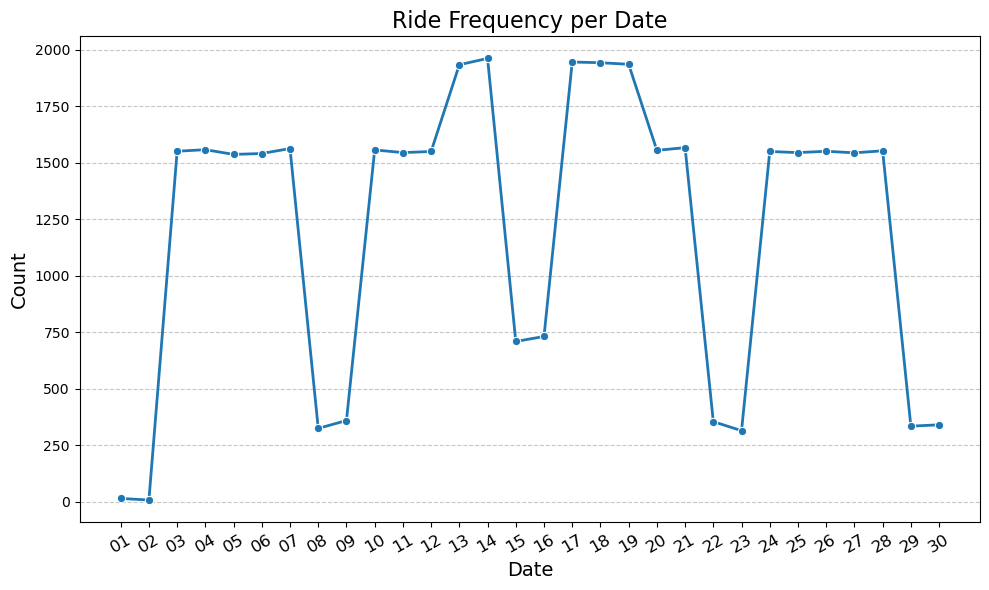

In [109]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=frequency_per_date.index, y=frequency_per_date.values, marker='o', linewidth=2)


# Adjust x-axis labels
plt.xticks(rotation=30, fontsize=12)

# Add title and labels with larger font size
plt.title('Ride Frequency per Date', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

In [110]:
#setting order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_tapIn'] = pd.Categorical(df['day_tapIn'], categories=day_order, ordered=True)


In [111]:
frequency_per_day = df.pivot_table(index='day_tapIn', aggfunc='size')
frequency_per_day


C:\Users\User\AppData\Local\Temp\ipykernel_18544\1409655902.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  frequency_per_day = df.pivot_table(index='day_tapIn', aggfunc='size')


day_tapIn
Monday       6604
Tuesday      6591
Wednesday    6574
Thursday     6574
Friday       6645
Saturday     1735
Sunday       1751
dtype: int64

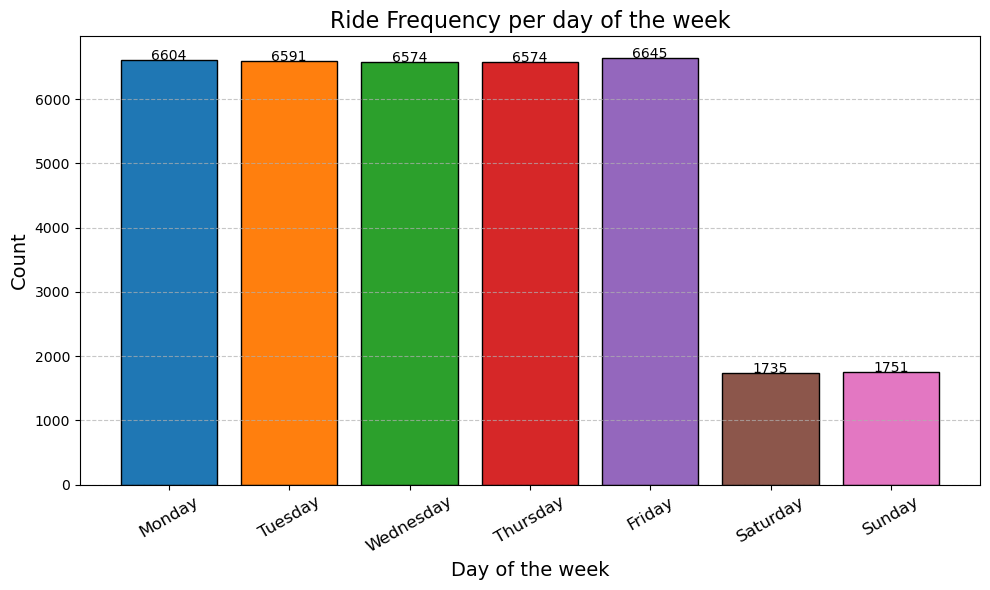

In [112]:
plt.figure(figsize=(10, 6))
plt.bar(frequency_per_day.index, frequency_per_day.values, color=colors, edgecolor='black')

# Add value labels above bars
for i, value in enumerate(frequency_per_day.values):
    plt.text(i, value, str(value), ha='center', fontsize=10)

# Adjust x-axis labels
plt.xticks(rotation=30, fontsize=12)

# Add title and labels with larger font size
plt.title('Ride Frequency per day of the week', fontsize=16)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

#### Ride Frequency per Date
1. **Sharp Drops**: Significant drop in rides around the 7th, 21st, and 30th.
2. **Peak Frequency**: Highest frequency consistently observed around mid-month (13th-17th).
3. **Pattern Suggestion**: Weekly fluctuations indicate certain days/monthly cycles affect ride demand.

#### Ride Frequency per Day of the Week
1. **Weekdays vs Weekends**:
   - Weekdays (Monday to Friday): Consistently high demand (6,500+ rides/day).
   - Weekends (Saturday, Sunday): Much lower demand (~1,750 rides/day).
2. **Peak Day**: Friday shows slightly higher ride frequency compared to other weekdays.
3. **Usage Trend**: Likely reflects work commutes on weekdays and reduced movement on weekends.

In [113]:
df['type'] = df['payAmount'].apply(lambda x: 'TransJakarta' if x == 3500 else 'MikroTrans' if x == 0 else 'RoyalTrans')

In [114]:
frequency_per_hour = df.pivot_table(index=['hour_tapIn', 'type'], aggfunc='size').reset_index()
frequency_per_hour.columns

Index(['hour_tapIn', 'type', 0], dtype='object')

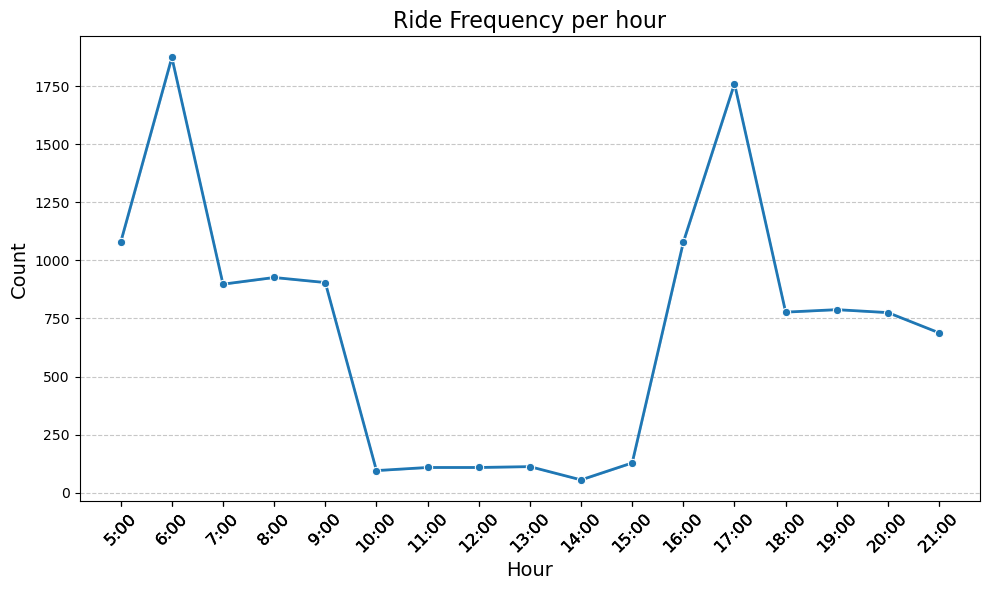

In [115]:
plt.figure(figsize=(10, 6))
sns.lineplot(data= frequency_per_hour, x='hour_tapIn', y=0, marker='o', linewidth=2, errorbar= ('ci', 0))


# Adjust x-axis labels
plt.xticks(rotation=30, fontsize=12)

# Add title and labels with larger font size
plt.title('Ride Frequency per hour', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(frequency_per_hour['hour_tapIn'], [f"{h}:00" for h in frequency_per_hour['hour_tapIn']], rotation=45)
# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

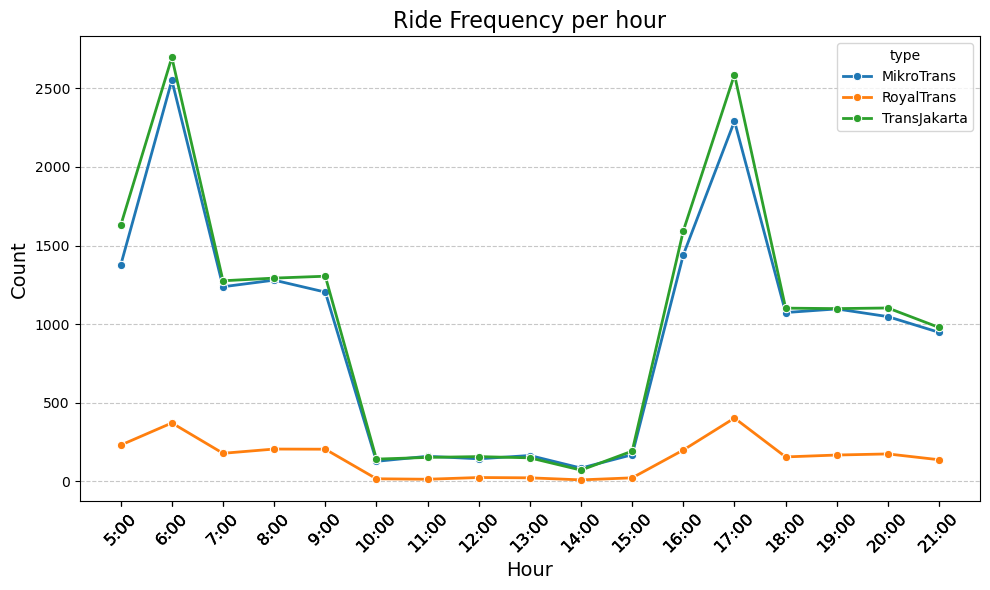

In [116]:
plt.figure(figsize=(10, 6))
sns.lineplot(data= frequency_per_hour, x='hour_tapIn', y=0, marker='o', linewidth=2, hue= 'type')


# Adjust x-axis labels
plt.xticks(rotation=30, fontsize=12)

# Add title and labels with larger font size
plt.title('Ride Frequency per hour', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(frequency_per_hour['hour_tapIn'], [f"{h}:00" for h in frequency_per_hour['hour_tapIn']], rotation=45)
# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

#### Ride Frequency by Hour
1. **Peak Hours**:
   - Morning: Significant peak around 6-7 AM.
   - Evening: Another major peak at 5-6 PM.
   
2. **Low Activity Period**:
   - Midday (10 AM - 2 PM): Noticeably lower ride frequency, indicating reduced demand.

3. **Usage Trend**:
   - Morning and evening peaks align with typical commuting hours, suggesting rides are primarily used for work-related travel.

#### Trend Implications and suggestion
- **Trend Implications**:
  - The busiest time periods are **6-7 AM** and **5-6 PM**, which align with typical commuting hours during **weekdays**.
  - Ride demand significantly drops during midday and outside peak hours, suggesting a clear focus on work-related travel.

- **Suggestion**:
  - Allocate additional resources (e.g., vehicles, drivers) during peak hours to handle increased demand efficiently.
  - Consider promoting **off-peak discounts or campaigns** to balance demand and increase utilization during low-activity periods (eg: Discounted fares on off-peak days, Subscription Packages)


## Corridor and station Analysis
 - Identify popular route and station for tap in and tap out
 - Look for overcrowding in peak hours

In [117]:
def corridor_merge (data, name):
    return data[name] + ' (' + data['corridorID'] + ')'

In [118]:
corridor_count = df.groupby(['corridorID', 'corridorName']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
corridor_count['name'] = corridor_merge(corridor_count, 'corridorName')
corridor_count

,corridorID,corridorName,count,name
40,1T,Cibubur - Balai Kota,390,Cibubur - Balai Kota (1T)
216,S21,Ciputat - CSW,381,Ciputat - CSW (S21)
196,JIS3,Harmoni - Jakarta International Stadium,341,Harmoni - Jakarta International Stadium (JIS3)
120,JAK.06,Kampung Rambutan - Pondok Gede,335,Kampung Rambutan - Pondok Gede (JAK.06)
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,327,Rusun Pondok Bambu - Walikota Jakarta Timur (11P)
93,8C,Kebayoran Lama - Tanah Abang,326,Kebayoran Lama - Tanah Abang (8C)
44,2E,Rusun Rawa Bebek - Kodamar,315,Rusun Rawa Bebek - Kodamar (2E)
101,9D,Pasar Minggu - Tanah Abang,312,Pasar Minggu - Tanah Abang (9D)
210,M7B,BKN - Blok M,309,BKN - Blok M (M7B)
76,6N,Ragunan - Blok M via Kemang,301,Ragunan - Blok M via Kemang (6N)


In [119]:
tapIn_count = df.groupby(['corridorID', 'tapInStopsName','tapInStopsLat','tapInStopsLon']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
tapIn_count['name'] = corridor_merge(tapIn_count, 'tapInStopsName')
tapIn_count

,corridorID,tapInStopsName,tapInStopsLat,tapInStopsLon,count,name
1544,9N,Garuda Taman Mini,-6.290154,106.88116,165,Garuda Taman Mini (9N)
742,3C,Rusun Kapuk Muara,-6.135667,106.76299,125,Rusun Kapuk Muara (3C)
741,3C,Penjaringan,-6.126306,106.79203,112,Penjaringan (3C)
1253,7C,Cibubur Junction,-6.368735,106.89366,90,Cibubur Junction (7C)
3228,JIS3,Simpang Danau Sunter Utara Barat,-6.139853,106.85663,86,Simpang Danau Sunter Utara Barat (JIS3)
3296,M13,Seskoal,-6.238064,106.77121,78,Seskoal (M13)
138,11K,Penggilingan,-6.214132,106.93961,70,Penggilingan (11K)
291,12H,Rusun Penjaringan,-6.130702,106.79487,69,Rusun Penjaringan (12H)
290,12H,Penjaringan,-6.126306,106.79203,67,Penjaringan (12H)
3519,S31,Bintaro Xchange,-6.286813,106.72865,67,Bintaro Xchange (S31)


In [120]:
tapOut_count = df.groupby(['corridorID' , 'tapOutStopsName', 'tapOutStopsLat','tapOutStopsLon']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
tapOut_count['name'] = corridor_merge(tapOut_count, 'tapOutStopsName')
tapOut_count

,corridorID,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,count,name
701,3C,Penjaringan,-6.126306,106.79203,125,Penjaringan (3C)
1515,9N,BKN,-6.257751,106.87000,119,BKN (9N)
702,3C,Rusun Kapuk Muara,-6.135667,106.76299,112,Rusun Kapuk Muara (3C)
1517,9N,Pinang Ranti,-6.291075,106.88634,104,Pinang Ranti (9N)
3071,JIS3,Jembatan Item,-6.130078,106.85492,98,Jembatan Item (JIS3)
1219,7C,Cibubur Junction,-6.368735,106.89366,98,Cibubur Junction (7C)
1217,7C,BKN,-6.257751,106.87000,88,BKN (7C)
2539,JAK.43C,Jln. Tebet Timur Dalam VIII J,-6.242064,106.85845,81,Jln. Tebet Timur Dalam VIII J (JAK.43C)
3087,L13E,Latuharhary,-6.202761,106.82771,77,Latuharhary (L13E)
130,11K,Penggilingan,-6.214132,106.93961,71,Penggilingan (11K)


In [121]:
colors = [
    "#1f77b4",  # Blue
    "#ff7f0e",  # Orange
    "#2ca02c",  # Green
    "#d62728",  # Red
    "#9467bd",  # Purple
    "#8c564b",  # Brown
    "#e377c2",  # Pink
    "#7f7f7f",  # Gray
    "#bcbd22",  # Olive
    "#17becf"   # Cyan
    ]

In [122]:
def bar_count(data, x, y, title):

    plt.figure(figsize=(10, 6))
    ax = plt.bar(data[x], data[y], color=colors, edgecolor='black')


    for bar in ax:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  
            height,                           
            f"{int(height)}",                  
            ha='center', va='bottom',          
            fontsize=10, color='black'
        )

    plt.title(title, fontsize=14)
    plt.xlabel("Stop Name", fontsize=12)
    plt.ylabel("Total Count", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)


    # Show the chart
    plt.tight_layout()
    plt.show()

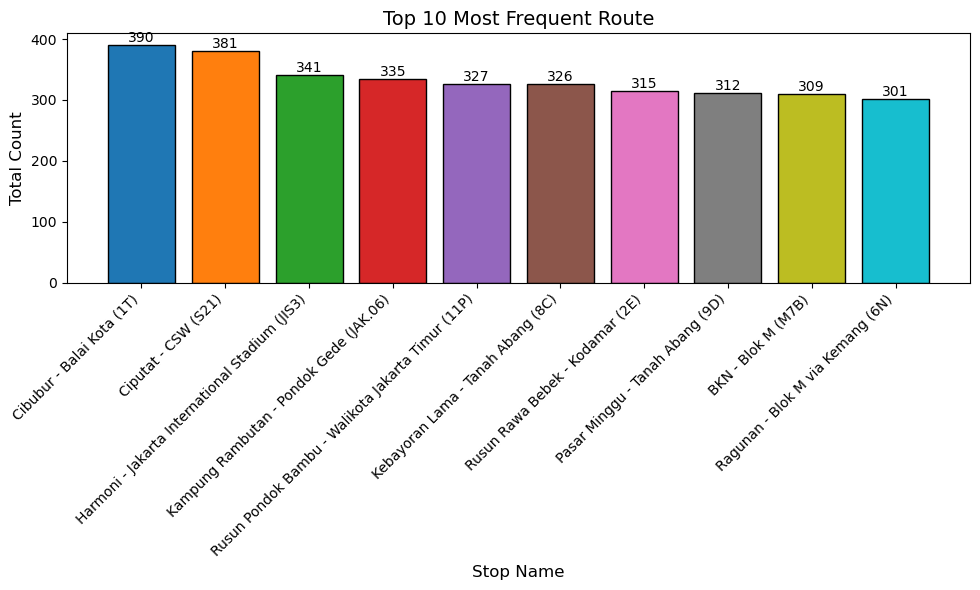

In [123]:
bar_count(corridor_count, 'name', 'count', 'Top 10 Most Frequent Route')

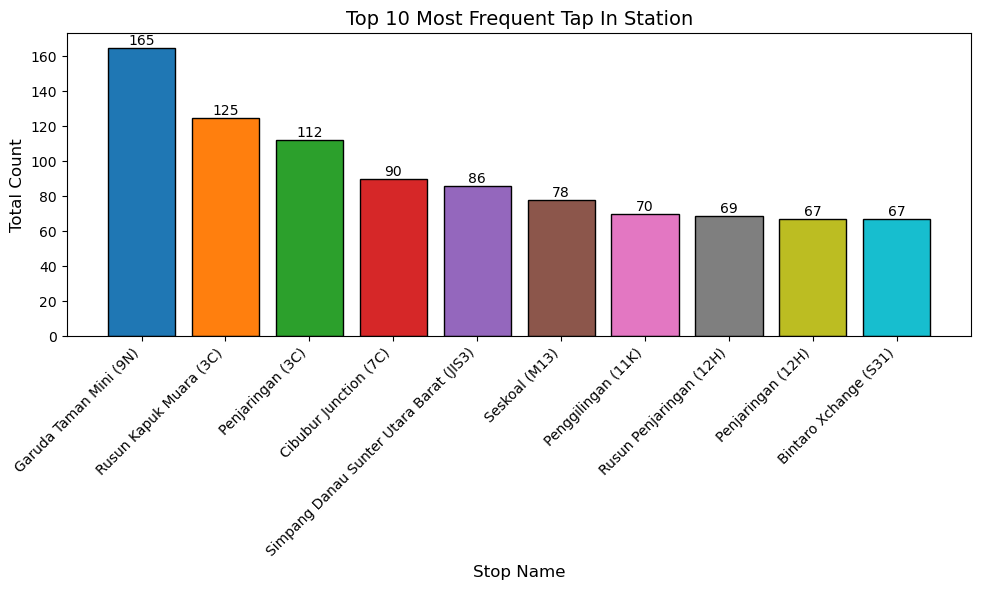

In [124]:
bar_count(tapIn_count, 'name', 'count', 'Top 10 Most Frequent Tap In Station')

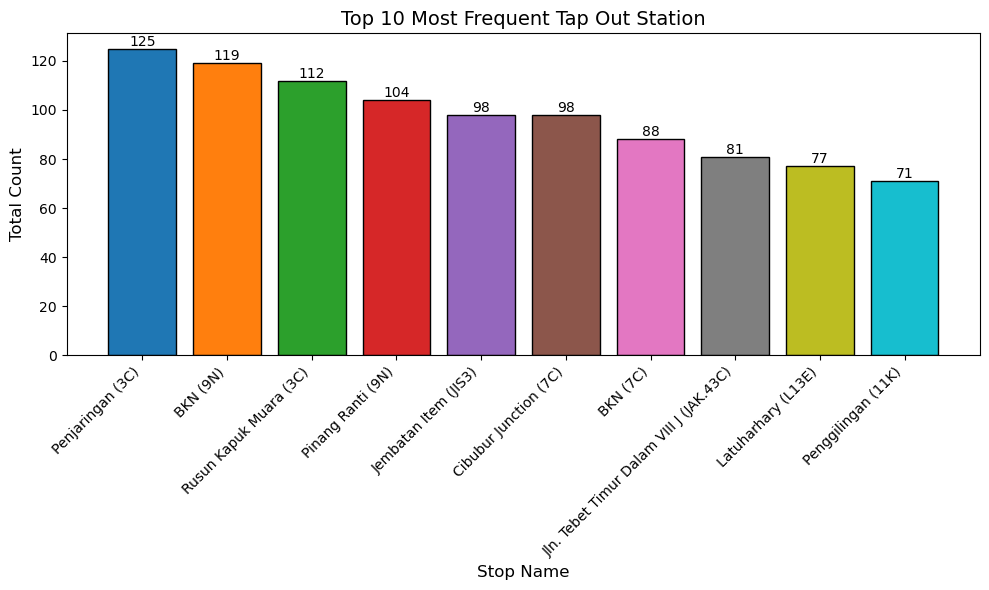

In [125]:
bar_count(tapOut_count, 'name', 'count', 'Top 10 Most Frequent Tap Out Station')

### Is there overcrowding in peak times?
To identify overcrowding we will compare stations within the peak time (5-6am & 4-5pm)

In [126]:
morning_peak_hour_data  = df[df['hour_tapIn'].isin([5, 6])]
eveneing_peak_hour_data_15  = df[df['hour_tapIn'].isin([15, 16])]
eveneing_peak_hour_data_16  = df[df['hour_tapIn'].isin([16, 17])]

In [127]:
morning_peak_pivot = morning_peak_hour_data.pivot_table(index='hour_tapIn', 
                                           columns='tapInStopsName', 
                                           aggfunc='size', 
                                           fill_value=0)
morning_peak_pivot

tapInStopsName,18 Office Park,ASEAN,ASMI,Ahmad Yani Bea Cukai,Akper Fatmawati Pondok Labu,Al Izhar Pondok Labu 2,Al Khairiyah School,Al Mukhlisin,Al Wathoniyah 1,Ambassador,Ampera 2,Ampera Garden,Ampera Yos Sudarso,Ancol Pintu 2,Andara Margasatwa 4,Aneka PIK Penggilingan,Apartemen Simprug Teras,Ariobimo Sentral,Arsip Nasional RI 1,Aston Pluit 2,At Thahiriah 1,Atrium 1,Atrium 2,BKN,BNN Arah Barat,BNN Jakarta Utara,BNN LRT,BSI 1,BSI 2,BSI Cengkareng,BTC 2,Badan Diklat Kejaksaan RI,Baladewa Residence,Balai Kartini,Balai Kota,Balai Kota 1,Balai Pertamina,Balai Sudirman,Balaikota Depok 2,Bank Indonesia 2,Bank Indonesia Arah Utara,Baywalk 2,Bekasi Barat,Bendungan Hilir,Bengkel Jln. Letjen Suprapto,Benhil 2,Benhil 3,Bermis,Bidara 2,Bidara Cina,Blok M Jalur 3,Blok M Jalur 4,Boulevard Bukit Gading Raya,Brimob Pejaten Barat 2,Buaran Raya,Budi Utomo,Bumi Perkemahan Ragunan,Buncit Indah,Bundaran HI,Bundaran Senayan,Bundaran Senayan 1,Bundaran Senayan 2,Buperta Cibubur,CBD Ciledug,CSW 1,Cakung United Tractors,Carrefour Lebak Bulus,Casablanca,Cawang Ciliwung Arah Barat,Cawang Otista,Cawang UKI,Cempaka Mas,Cempaka Putih,Cervino Village,Chase Plaza,Cibubur Junction,Cikoko Stasiun Cawang Arah Barat,Cilandak,Cipinang Baru,Cipinang Kb. Nanas 1,Cipinang Kebon Nanas,Cipinang Melayu Kalimalang,Cipta Rasuna Said,Cipulir,Cut Meutia,D Mall,DPP FPI,DPR MPR 2,Danau Agung,Danau Agung 1,Departemen Kesehatan,Departemen Pertanian,Dinas Kebersihan Duren Sawit,Dinas Olahraga Dan Pemuda,Dispenda Samsat Barat,Dittopad,Dukuh Atas,Dukuh Atas 2,Duren Tiga,Duren Tiga 1,EKS Komplek Gaya Motor,Enggano,Epiwalk Epicentrum,Erha Clinic,Essence Dharmawangsa,Explorer Tanah Abang,FX Sudirman,Flyover Bintaro,Flyover Jatinegara 1,Flyover Jatinegara 2,Flyover Kampung Melayu,Flyover Klender,Flyover Pulo Gebang 1,Flyover Radin Inten 1,Flyover Raya Bogor,GBK Pintu 7,GKJ Tj. Priok,GOR Sumantri 2,GP Mall 2,GPIB Bukit Moria,Gading Serpong 1,Gama Tower,Gambir 1,Gardu Induk Plumpang,Garuda Taman Mini,Gatot Subroto Jamsostek Arah Barat,Gatot Subroto Jamsostek Arah Timur,Gedong Panjang,Gedung Granadi,Gelanggang Remaja Ciracas,Gelanggang Remaja Pasar Minggu,Gelanggang TB Simatupang,Gelora Bung Karno,Gelora Bung Karno 1,Gempol Baru 2,Gerbang Tol Bambu Apus 2,Gerbang Tol Brigif,Gerbang Tol Meruya Selatan 1,Gerbang Tol Veteran,Gereja HKBP Duren Sawit,Gereja Jemaat Kiwi,Gereja Tiberias Kelapa Gading,Gg. Aim 2,Gg. Ali,Gg. Bambu Sukapura,Gg. Borobudur Ragunan,Gg. Burung Dalam,Gg. CC Palmerah,Gg. Damai Lingkar Timur,Gg. H. Abdullah Marunda,Gg. H. Doel Bojong Raya,Gg. H. Ganan,Gg. H. Mesir,Gg. H. Seman Susukan,Gg. H. Yahya Balekambang,Gg. Kancil Marunda,Gg. Kelor,Gg. Kelor 2,Gg. Koperasi Ciracas,Gg. Kunir II,Gg. Mawar Kb. Jeruk,Gg. Padi Pelita Cipinang,Gg. Randu,Gg. Rukun Lingkar Timur,Gg. Sawo Jagakarsa,Gg. Siluman Cililitan Besar,Gg. Subuh,Gg. Suka Damai,Gg. Swadaya 2 G,Gg. VIII Muara Baru,Glodok,Gold Coast,Gongseng,Graha Dirgantara,Graha Jasindo,Grand Pasar Minggu,Grand Sahid,Griya Kukila Halim Perdanakusuma,Grogol 1,Grogol 2 Arah Utara,Gunung Sahari Mangga Dua,Gunung Sahari Mangga Dua Timur,H. Nawi Jln. Madrasah,Halimun,Harapan Indah Boulevard,Hotel Mega Anggrek,Hotel Olive 1,IGI,IRTI,Imigrasi,Imigrasi Jaktim 2,Imperium,Indosiar,Iskandar Muda,Islamic,JORR,JPO Blok E,JPO Mandiri,JPO Timur Pondok Indah 1,Jagakarsa St. Lenteng Agung,Jagal 1,Jaha,Jak Lingko Tanah Abang,Jak Lingko Tanah Abang 2,Jakarta Islamic Centre 2,Jamsostek Gatot Subroto,Jati Padang,Jatibening 1,Jelambar,Jembatan Besi,Jembatan Dua,Jembatan Gantung,Jembatan Item,Jembatan Merah,Jembatan Muara Bahari,Jembatan Pesakih Semanan,Jembatan Serong,Jembatan Tiga Arah Utara,Jln. A Lagoa,Jln. Al Hidayah Basmol,Jln. Ampera VI Gunung Sahari,Jln. Ancol Barat 1,Jln. Andara Raya,Jln. Aneka Elok 2,Jln. Anggrek Petukangan,Jln. Anggrek Raya,Jln. Arus Jati,Jln. Asmin 2,Jln. B,Jln. B Basmol Raya,Jln. BB Utara,Jln. Batas II Baru,Jln. Batu Permata V,Jln. Batu Tumbuh I,Jln. Bekasi Timur I Jatinegara,Jln. Bekasi Timur VI,Jln. Belanak III Rawamangun,Jl

In [128]:
evening_peak_pivot_15 = eveneing_peak_hour_data_15.pivot_table(index='hour_tapIn', 
                                           columns=['tapInStopsName'], 
                                           aggfunc='size', 
                                           fill_value=0)

In [129]:
evening_peak_pivot_16 = eveneing_peak_hour_data_16.pivot_table(index='hour_tapIn', 
                                           columns=['tapInStopsName'], 
                                           aggfunc='size', 
                                           fill_value=0)

In [130]:
morning_total = morning_peak_pivot.mean(axis=0).sort_values(ascending=False)
morning_total

tapInStopsName
Garuda Taman Mini          35.0
Rusun Kapuk Muara          27.0
Tirtayasa                  25.0
BNN LRT                    24.0
Mangga Dua                 24.0
                           ... 
Jamsostek Gatot Subroto     0.5
SDN Duren Sawit 02          0.5
MI Imadun Najah Rorotan     0.5
Sekolah Bahasa Polri        0.5
Jln. Irigasi THB            0.5
Length: 979, dtype: float64

In [131]:
evening_total_15 = evening_peak_pivot_15.mean(axis=0).sort_values(ascending=False)
evening_total_15

tapInStopsName
BNN LRT                       15.0
Penjaringan                   14.5
Cibubur Junction              14.0
Masjid Agung                  13.5
BKN                           13.0
                              ... 
Pasar Genjing                  0.5
Pasar Baru Timur               0.5
Panti Sosial Bina Laras        0.5
Panti Perwira                  0.5
Yayasan Perguruan Rakyat 2     0.5
Length: 675, dtype: float64

In [132]:
evening_total_16 = evening_peak_pivot_16.mean(axis=0).sort_values(ascending=False)
evening_total_16

tapInStopsName
Penjaringan            39.5
Cibubur Junction       33.5
BNN LRT                33.0
BKN                    32.0
Grand Sahid            28.5
                       ... 
SD Diakonia 2           0.5
Rutan Salemba           0.5
Rusun Tanah Abang 1     0.5
Jembatan Gantung        0.5
ACC Simatupang          0.5
Length: 1013, dtype: float64

In [133]:
# Define Treshold 
# Capcity of normal transjakarta bus is 30
threshold = 30

In [134]:
def overcrowd_bar(data,title): 
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', color=colors, edgecolor='black')
    plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1.5, label=f'Bus capacity ({threshold:.2f})')

    for i, value in enumerate(data):
        plt.text(i, value + 0.2, value, ha='center', va='bottom', fontsize=10, color='black')

    plt.title(title)
    plt.xlabel("Station Name")
    plt.ylabel("Average Tap-Ins")

    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.legend(title='Overcrowding Threshold',fontsize=10, loc='upper right')
    plt.tight_layout()
    plt.show()

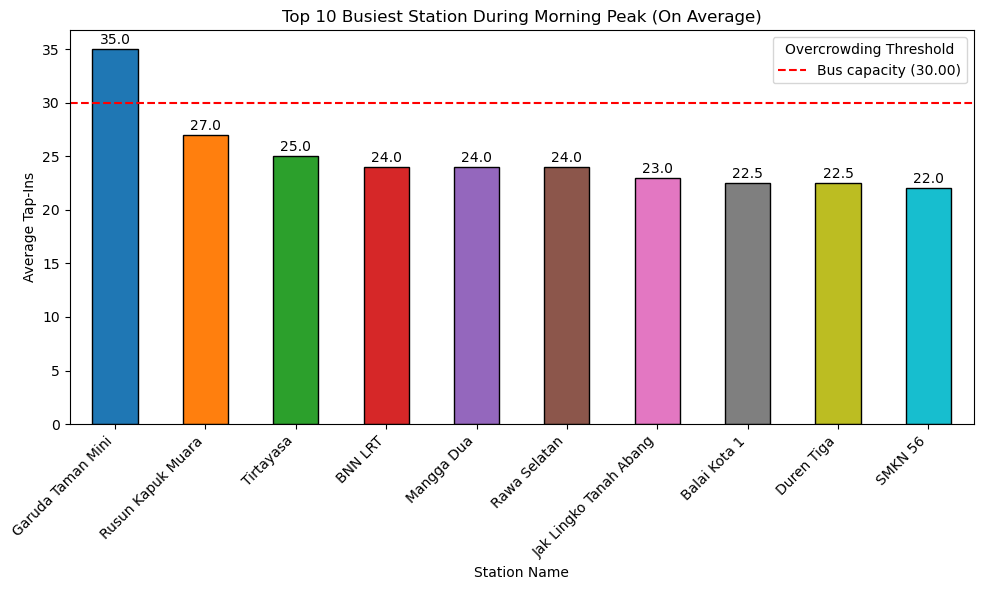

In [135]:
overcrowd_bar(morning_total.head(10),"Top 10 Busiest Station During Morning Peak (On Average)")

- In the morning, we can find overcrowded problem in Garuda Taman Mini station. This could be becasu of morning commute traffic since this station a part of route 7D and 9, which connect the eastern part of Jakarta to the central area and up to the northern part of Jakarta

In [136]:
df[df['tapInStopsName']=='Garuda Taman Mini']['corridorID'].value_counts()

corridorID
9N    165
9C     37
9       1
Name: count, dtype: int64

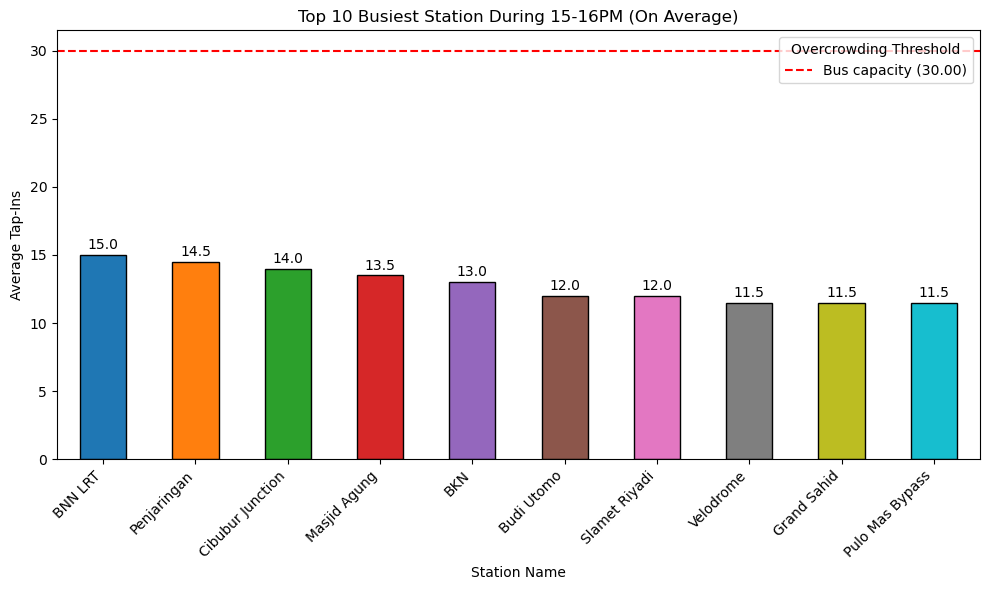

In [137]:
overcrowd_bar(evening_total_15.head(10),"Top 10 Busiest Station During 15-16PM (On Average)")

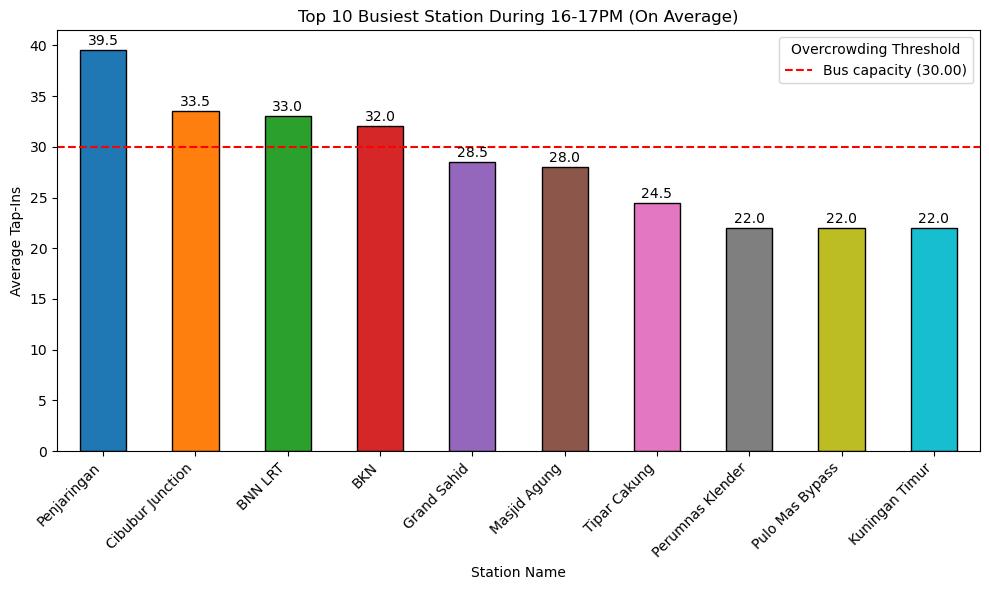

In [138]:
overcrowd_bar(evening_total_16.head(10),"Top 10 Busiest Station During 16-17PM (On Average)")

In [139]:
evening_over = evening_total_16.where(lambda x : x >threshold).dropna()

In [140]:
df[df['tapInStopsName'].isin(evening_over.index)].groupby([ 'tapInStopsName','corridorID']).size()

tapInStopsName    corridorID
BKN               5C             24
                  5D              1
                  7              20
                  7C             60
                  9N             58
BNN LRT           5B             20
                  5C              1
                  5D             20
                  7               1
                  7D              2
                  9               2
                  9A             21
                  9C              2
                  B11            36
                  B21            26
                  M9             19
Cibubur Junction  1K              1
                  1T             36
                  7C             90
Penjaringan       12             40
                  12A             1
                  12H            67
                  3C            112
                  9               7
                  9F              2
                  M9              6
dtype: int64

- Eventhough the rides count trend goes up from 15PM, we can find overcrowding during 16PM -17PM
- During 16-17PM, we can find overcrowded problem in Pejaringan, Cibubur Junctionn BNN LRT and BKN station. We found more overcrowded busses on average during the evening. Customer behaviour might affect this number since people are likely to rush going home rather than going tho work
- The overcrowded station have multiple routes within them, another reason for the high traffic in the evening

### Mapping out busy stations during peak time

In [141]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,generation,commute_type,age_group,day_tapIn,week_tapIn,hour_tapIn,date_tapIn,type
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:00,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:00,3500.0,16,Gen Z,School Commuter,12–21,Monday,14,5,03,TransJakarta
1,LGXO740D2N47GZ,4.885330e+15,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:00,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:00,3500.0,27,Gen Z,Work Commuter,22–31,Monday,14,5,03,TransJakarta
2,DJWR385V2U57TO,4.996230e+15,dki,Emong Wastuti,Female,1992,R1A,Pantai Maju - Kota,0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:00,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:00,3500.0,32,Millennials,Work Commuter,32–41,Monday,14,5,03,TransJakarta
3,JTUZ800U7C86EH,6.390990e+11,flazz,Surya Wacana,Female,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:00,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:00,3500.0,46,Gen X,Occasional Commuter,42–51,Monday,14,5,03,TransJakarta
4,VMLO535V7F95NJ,5.709280e+11,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:00,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:00,3500.0,42,Millennials,Work Commuter,42–51,Monday,14,6,03,TransJakarta


In [142]:
import folium
from folium.plugins import HeatMap

In [143]:
# Jakarta Map
m1 = folium.Map(location=[-6.190837391702661, 106.82471148166368], zoom_start=12)
m2 = folium.Map(location=[-6.190837391702661, 106.82471148166368], zoom_start=12)

In [144]:
#Getting lat and long

morning_cord = morning_peak_hour_data[morning_peak_hour_data['tapInStopsName'].isin(morning_total.head(10).index)].groupby('tapInStopsName')[['corridorID','tapInStopsLat', 'tapInStopsLon']].first().reset_index()

In [145]:
#Getting lat and long

evening_cord_15 = eveneing_peak_hour_data_15[eveneing_peak_hour_data_15['tapInStopsName'].isin(evening_total_15.head(10).index)].groupby('tapInStopsName')[['corridorID','tapInStopsLat', 'tapInStopsLon']].first().reset_index()
evening_cord_15

,tapInStopsName,corridorID,tapInStopsLat,tapInStopsLon
0,BKN,9N,-6.257751,106.870000
1,BNN LRT,B11,-6.245863,106.871143
2,Budi Utomo,5C,-6.166063,106.839060
3,Cibubur Junction,7C,-6.368735,106.893660
4,Grand Sahid,9D,-6.210975,106.820590
5,Masjid Agung,1,-6.236483,106.798450
6,Penjaringan,9,-6.126306,106.792030
7,Pulo Mas Bypass,M10,-6.176953,106.876000
8,Slamet Riyadi,5,-6.208533,106.859290
9,Velodrome,M4,-6.193468,106.888300


In [146]:
#Getting lat and long

evening_cord_16 = eveneing_peak_hour_data_16[eveneing_peak_hour_data_16['tapInStopsName'].isin(evening_total_16.head(10).index)].groupby('tapInStopsName')[['corridorID','tapInStopsLat', 'tapInStopsLon']].first().reset_index()
evening_cord_16

,tapInStopsName,corridorID,tapInStopsLat,tapInStopsLon
0,BKN,9N,-6.257751,106.870000
1,BNN LRT,B11,-6.245863,106.871143
2,Cibubur Junction,1T,-6.368735,106.893660
3,Grand Sahid,9D,-6.210975,106.820590
4,Kuningan Timur,6M,-6.234731,106.829020
5,Masjid Agung,1,-6.236483,106.798450
6,Penjaringan,12,-6.126306,106.792030
7,Perumnas Klender,M11,-6.216689,106.930540
8,Pulo Mas Bypass,M10,-6.176953,106.876000
9,Tipar Cakung,2F,-6.183387,106.924630


In [147]:
jak = folium.Map(location=[-6.2088, 106.8456], zoom_start=12)
jak1 = folium.Map(location=[-6.2088, 106.8456], zoom_start=12)
jak2 = folium.Map(location=[-6.2088, 106.8456], zoom_start=12)


In [148]:
for _, row in morning_cord.iterrows():
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']], 
        tooltip=f'Busy Station (Morning) {row['tapInStopsName']}', 
        popup= f'Route: {row['corridorID']}',                  
        icon=folium.Icon(color='red', icon='info-sign')   
    ).add_to(jak)


for _, row in evening_cord_15.iterrows():
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']], 
        tooltip=f'Busy Station (Evening) {row['tapInStopsName']}', 
        popup= f'Route: {row['corridorID']}',                  
        icon=folium.Icon(color='blue', icon='info-sign')   
    ).add_to(jak)

for _, row in evening_cord_16.iterrows():
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']], 
        tooltip=f'Busy Station (Evening) {row['tapInStopsName']}', 
        popup= f'Route: {row['corridorID']}',                  
        icon=folium.Icon(color='blue', icon='info-sign')   
    ).add_to(jak)
    

In [149]:
jak.save("jakarta_peak_stations_map.html")
jak

## Revenue Analysis
 - Identify which type of bus give the most revenue
 - Identify which age group/generation/gender give the most revenue

In [150]:
df.head(1)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,generation,commute_type,age_group,day_tapIn,week_tapIn,hour_tapIn,date_tapIn,type
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:00,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:00,3500.0,16,Gen Z,School Commuter,12–21,Monday,14,5,03,TransJakarta


In [151]:
df['type'] = df['payAmount'].apply(lambda x: 'TransJakarta' if x == 3500 else 'MikroTrans' if x == 0 else 'RoyalTrans')
df_u['type'] = df['type']

In [152]:
type_count = df.groupby('type').size()
type_count

type
MikroTrans      16399
RoyalTrans       2545
TransJakarta    17530
dtype: int64

In [153]:
type_sum = df.groupby('type')['payAmount'].sum().sort_values(ascending=False)
type_sum

type
TransJakarta    61355000.0
RoyalTrans      50900000.0
MikroTrans             0.0
Name: payAmount, dtype: float64

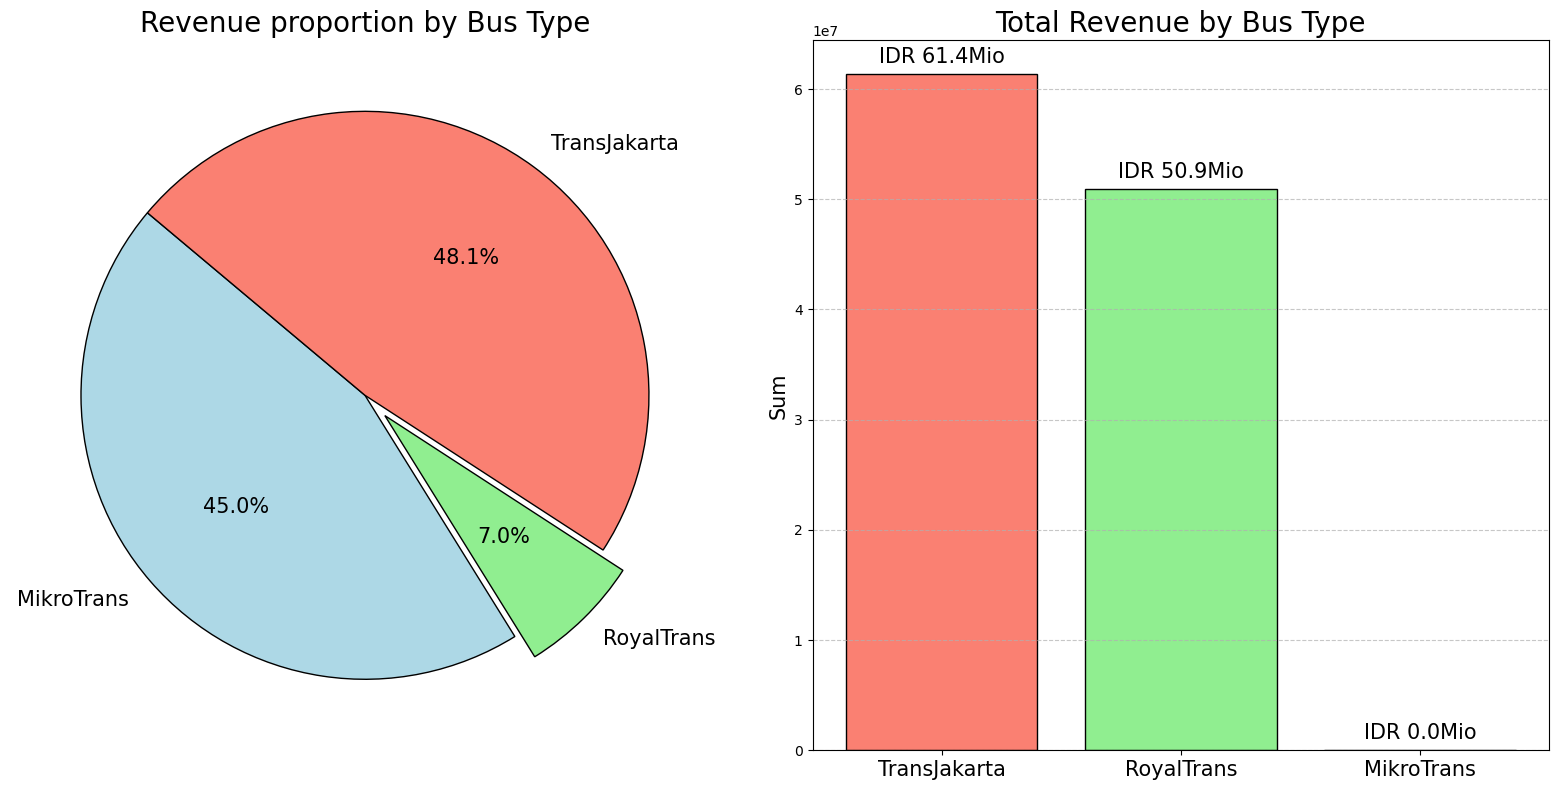

In [154]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1]})

color_pie = ['lightblue', 'lightgreen', 'salmon']
ax[0].pie(
    type_count.values, 
    labels=type_count.index, 
    autopct='%1.1f%%', 
    colors = color_pie,
    startangle=140, 
    explode=(0, 0.1, 0), 
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 15}
)
ax[0].set_title('Revenue proportion by Bus Type', fontsize=20)


# Bar Chart for Sum
bars = ax[1].bar(type_sum.index, type_sum.values, color= ['salmon', 'lightgreen', 'lightblue'], edgecolor='black')
ax[1].set_title('Total Revenue by Bus Type', fontsize=20)

ax[1].set_ylabel('Sum',fontsize=15)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].tick_params(axis='x', labelsize=15)
for bar in bars:
    height = bar.get_height()
    ax[1].annotate(
        f"IDR {height / 1_000_000:.1f}Mio", 
        xy=(bar.get_x() + bar.get_width() / 2, height),  
        xytext=(0, 5), 
        textcoords='offset points',
        ha='center', va='bottom', fontsize=15, color='black'
    )

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Key Insights

- **TransJakarta**:
  - Largest contributor in terms of service share (48.1%) and revenue generation (IDR 61,355,000).

- **RoyalTrans**:
  - Smallest share (7%) but generates significant revenue (IDR 50,900,000).
  - Likely indicates higher ticket pricing or premium services.

- **MikroTrans**:
  - Significant distribution share (45%) but does not generate revenue.
  - Likely provides subsidized/free services or operates under a different revenue model.


### Revenue distribution by day of the week

In [155]:
rev_day = df.groupby(['type','day_tapIn'])[['payAmount']].sum().reset_index()
rev_day

C:\Users\User\AppData\Local\Temp\ipykernel_18544\1948184741.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rev_day = df.groupby(['type','day_tapIn'])[['payAmount']].sum().reset_index()


,type,day_tapIn,payAmount
0,MikroTrans,Monday,0.0
1,MikroTrans,Tuesday,0.0
2,MikroTrans,Wednesday,0.0
3,MikroTrans,Thursday,0.0
4,MikroTrans,Friday,0.0
5,MikroTrans,Saturday,0.0
6,MikroTrans,Sunday,0.0
7,RoyalTrans,Monday,9280000.0
8,RoyalTrans,Tuesday,9120000.0
9,RoyalTrans,Wednesday,9200000.0


In [156]:
def bar_bus_stacked (data, x, title, xlabel, y='payAmount', hue = 'type', xticks_labels = None ):
    plt.figure(figsize=(12, 6))
    bar_plot = sns.barplot(data=data, x=x, y=y, hue=hue, palette=color_pie, errorbar=None)

    # Add title and labels
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Payment Amount (IDR)", fontsize=12)

    # Annotate bars with values
    for container in bar_plot.containers:
        bar_plot.bar_label(container, 
                           labels=[f'IDR {value / 1_000_000:.1f} Mio' for value in container.datavalues],
                        label_type='edge', 
                        fontsize=10)

    # Rotate x-axis labels if needed
    if xticks_labels:
        plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=45, fontsize=10)
    else:
        plt.xticks(rotation=45)

    # Display legend
    plt.legend(title='Bus Type', title_fontsize=12, fontsize=10, loc='upper right')
    bar_plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
    # Show plot
    plt.tight_layout()
    plt.show()

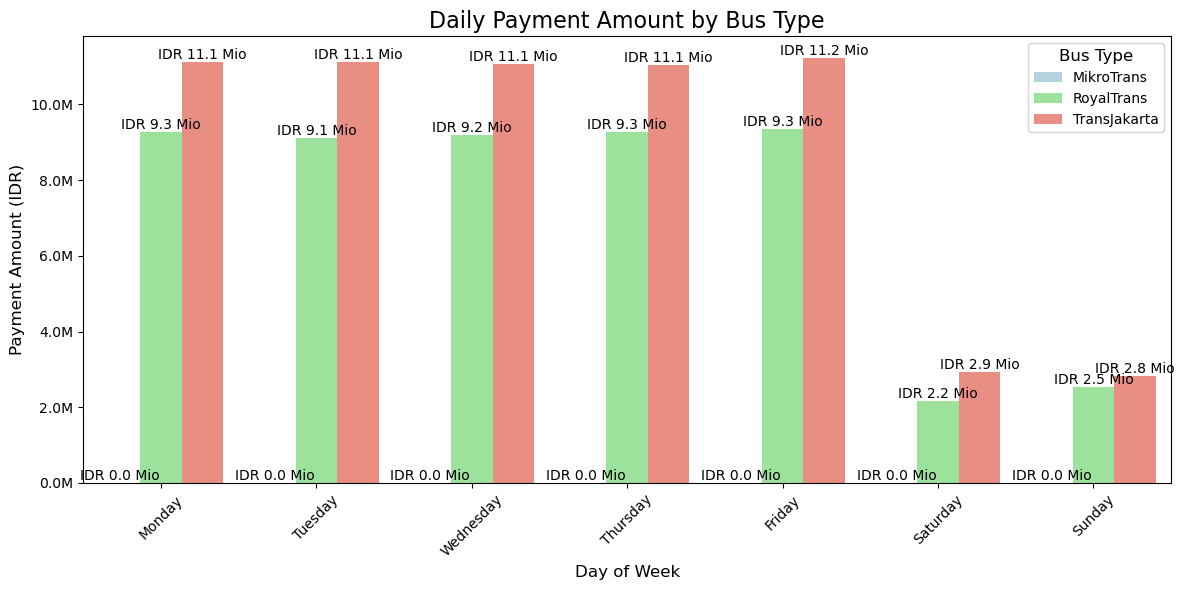

In [157]:
bar_bus_stacked(rev_day, 'day_tapIn',"Daily Payment Amount by Bus Type", "Day of Week" )

#### Key Insights

- **TransJakarta**:
  - Generates the highest payment amounts across all weekdays (Monday through Friday), consistently exceeding **IDR 11M**.
  - Experiences a drop in payments over the weekend, with **IDR 2.82M** on Sunday.

- **RoyalTrans**:
  - Consistent payment amount just below **IDR 9.5M** on weekdays.
  - Sharp decline on weekends, with payments around **IDR 2.16M** on Saturday and **IDR 2.54M** on Sunday.

---

##### Weekday vs. Weekend Patterns

- **Higher Payments on Weekdays**:
  - Both **TransJakarta** and **RoyalTrans** generate significantly more payments on weekdays compared to weekends.
  - Indicates that these services are primarily used for commuting purposes during workdays.

- **Lower Payments on Weekends**:
  - Payments for both **TransJakarta** and **RoyalTrans** decline by more than **70%** on weekends, reflecting lower public transportation usage during leisure days.

---

##### Comparative Analysis

- **TransJakarta vs. RoyalTrans**:
  - TransJakarta consistently outperforms RoyalTrans in payment amounts across all days.
  - Weekday payments for TransJakarta are **20-25% higher** than RoyalTrans.




### Identifying customer segmentation for revenue 
Continuing we will be not using MikroTrans since its a subsidized bus.

In [158]:
df_filtered = df[df['type'] != 'MikroTrans']
df_filtered

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,generation,commute_type,age_group,day_tapIn,week_tapIn,hour_tapIn,date_tapIn,type
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:00,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:00,3500.0,16,Gen Z,School Commuter,12–21,Monday,14,5,03,TransJakarta
1,LGXO740D2N47GZ,4.885330e+15,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:00,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:00,3500.0,27,Gen Z,Work Commuter,22–31,Monday,14,5,03,TransJakarta
2,DJWR385V2U57TO,4.996230e+15,dki,Emong Wastuti,Female,1992,R1A,Pantai Maju - Kota,0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:00,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:00,3500.0,32,Millennials,Work Commuter,32–41,Monday,14,5,03,TransJakarta
3,JTUZ800U7C86EH,6.390990e+11,flazz,Surya Wacana,Female,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:00,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:00,3500.0,46,Gen X,Occasional Commuter,42–51,Monday,14,5,03,TransJakarta
4,VMLO535V7F95NJ,5.709280e+11,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:00,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:00,3500.0,42,Millennials,Work Commuter,42–51,Monday,14,6,03,TransJakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37888,KWQA944F9O89IN,6.585890e+15,dki,Hardana Gunarto,Female,1982,B14,Bekasi Barat - Kuningan,0,B00664P,GOR Sumantri 2,-6.221038,106.83189,11,2023-04-05 09:30:00,B02411P,Menara Duta,-6.208617,106.82986,14.0,2023-04-05 11:58:00,20000.0,42,Millennials,Work Commuter,42–51,Wednesday,14,9,05,RoyalTrans
37895,ZWEC949B8Q87QG,4.685820e+18,brizzi,Kamila Mahendra,Female,2004,6B,Ragunan - MH Thamrin via Semanggi,1,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:00,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:00,3500.0,20,Gen Z,College/Entry-Level Commuter,12–21,Friday,16,18,21,TransJakarta
37896,YHHK837P6Y95GN,6.502900e+15,dki,Titi Siregar,Male,1974,9N,Pinang Ranti - Pramuka,1,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:00,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:00,3500.0,50,Gen X,Occasional Commuter,42–51,Tuesday,16,21,18,TransJakarta
37897,YXPP627N4G95HO,2.131590e+14,emoney,drg. Zahra Nashiruddin,Female,1976,1T,Cibubur - Balai Kota,1,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:00,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:00,20000.0,48,Gen X,Occasional Commuter,42–51,Tuesday,14,10,04,RoyalTrans


In [159]:
rev_commute_type = df_filtered.groupby(['commute_type','type','payCardSex'])[['payAmount']].sum().reset_index()
rev_commute_type

,commute_type,type,payCardSex,payAmount
0,College/Entry-Level Commuter,RoyalTrans,Female,2160000.0
1,College/Entry-Level Commuter,RoyalTrans,Male,1340000.0
2,College/Entry-Level Commuter,TransJakarta,Female,5726000.0
3,College/Entry-Level Commuter,TransJakarta,Male,3902500.0
4,Leisure Commuter,RoyalTrans,Male,40000.0
5,Leisure Commuter,TransJakarta,Female,140000.0
6,Leisure Commuter,TransJakarta,Male,1288000.0
7,Occasional Commuter,RoyalTrans,Female,960000.0
8,Occasional Commuter,RoyalTrans,Male,6020000.0
9,Occasional Commuter,TransJakarta,Female,2240000.0


In [160]:
fig = px.treemap(rev_commute_type, 
                 path=['commute_type', 'type', 'payCardSex'], 
                 values='payAmount', 
                 title="Treemap of PayAmount by Commute Type, Bus Type, and Gender")
fig.show()

In [161]:
rev_tj = rev_commute_type[rev_commute_type['type']=='TransJakarta']
rev_rt = rev_commute_type[rev_commute_type['type']=='RoyalTrans']


In [162]:
rev_tj

,commute_type,type,payCardSex,payAmount
2,College/Entry-Level Commuter,TransJakarta,Female,5726000.0
3,College/Entry-Level Commuter,TransJakarta,Male,3902500.0
5,Leisure Commuter,TransJakarta,Female,140000.0
6,Leisure Commuter,TransJakarta,Male,1288000.0
9,Occasional Commuter,TransJakarta,Female,2240000.0
10,Occasional Commuter,TransJakarta,Male,6800500.0
13,School Commuter,TransJakarta,Female,5908000.0
14,School Commuter,TransJakarta,Male,2565500.0
17,Work Commuter,TransJakarta,Female,17829000.0
18,Work Commuter,TransJakarta,Male,14955500.0


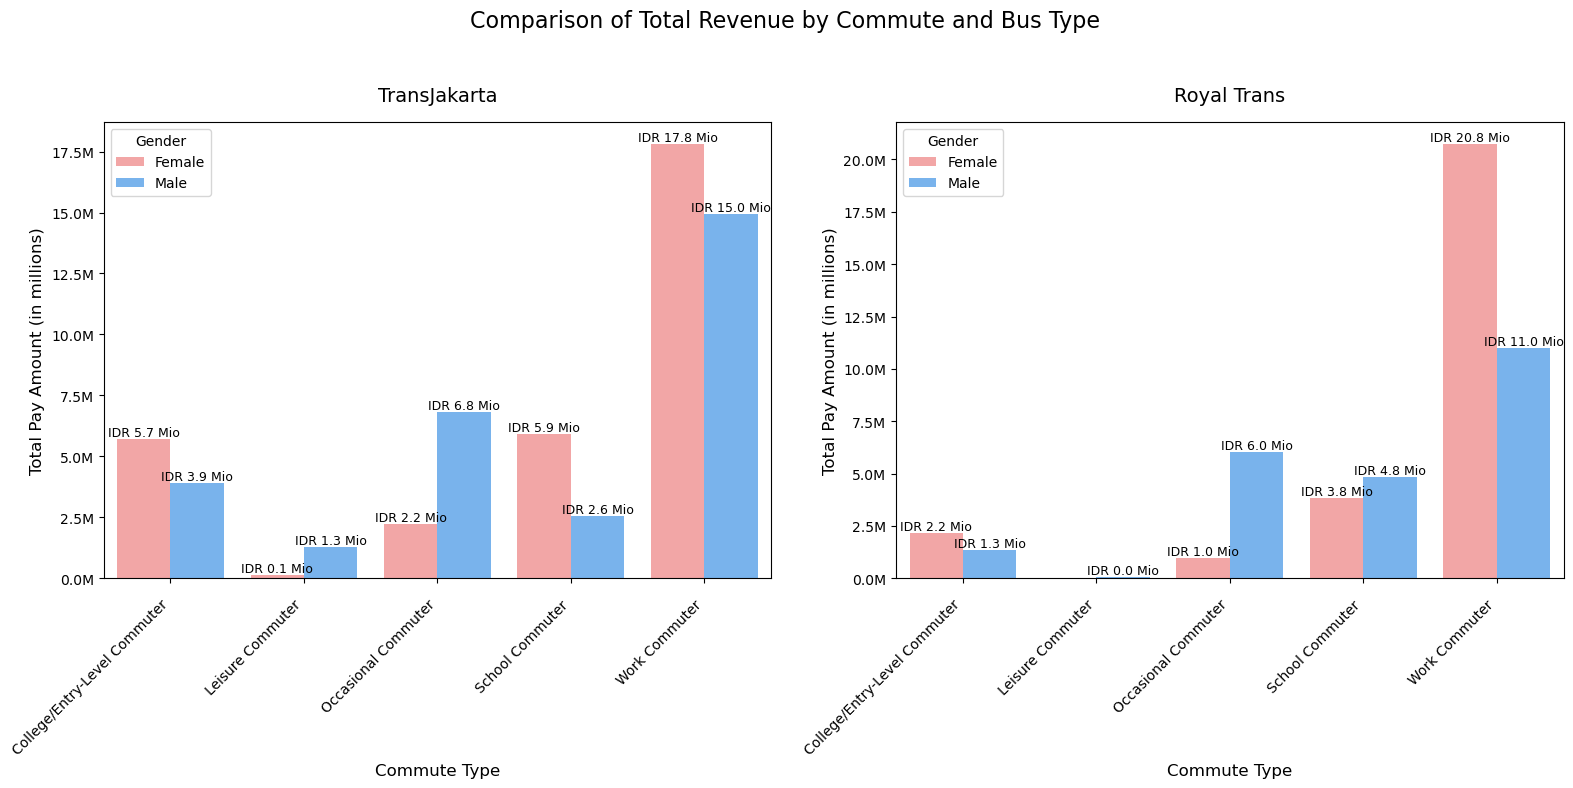

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Comparison of Total Revenue by Commute and Bus Type', fontsize=16)
# Plot 1: TransJakarta
sns.barplot(data=rev_tj, x='commute_type', y='payAmount', hue='payCardSex', palette=gender_colors, ax=axes[0])

# Add annotations for TransJakarta
for container in axes[0].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            axes[0].text(
                bar.get_x() + bar.get_width() / 2,  # Center of the bar
                bar.get_y() + height,  # Top of the bar
                f'IDR {height / 1_000_000:.1f} Mio',  # Label text
                ha='center',  # Horizontal alignment
                va='bottom',  # Vertical alignment
                fontsize=9
            )

axes[0].set_title('TransJakarta', fontsize=14, pad=15)
axes[0].set_ylabel('Total Pay Amount (in millions)', fontsize=12)
axes[0].set_xlabel('Commute Type', fontsize=12, )
axes[0].legend(title='Gender', fontsize=10)
axes[0].tick_params(axis='x', rotation=45, pad=10,labelright=False) 
for label in axes[0].get_xticklabels():
    label.set_horizontalalignment('right') 
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
# Plot 2: Royal Trans
sns.barplot(data=rev_rt, x='commute_type', y='payAmount', hue='payCardSex', palette=gender_colors, ax=axes[1])

# Add annotations for Royal Trans
for container in axes[1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            axes[1].text(
                bar.get_x() + bar.get_width() / 2,  # Center of the bar
                bar.get_y() + height,  # Top of the bar
                f'IDR {height / 1_000_000:.1f} Mio',  # Label text
                ha='center',  # Horizontal alignment
                va='bottom',  # Vertical alignment
                fontsize=9
            )

axes[1].set_title('Royal Trans', fontsize=14, pad=15)
axes[1].set_ylabel('Total Pay Amount (in millions)', fontsize=12)
axes[1].set_xlabel('Commute Type', fontsize=12)
axes[1].legend(title='Gender', fontsize=10)
axes[1].tick_params(axis='x', rotation=45, pad=10, labelright=False) 

for label in axes[1].get_xticklabels():
    label.set_horizontalalignment('right') 
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()



#### Insights from the Visualizations
TransJakarta:
- The highest revenue comes from **"Work Commuters"**:
  - Females: IDR 17.8M
  - Males: IDR 15.0M
- **"Occasional Commuters"**:
  - Males: IDR 6.8M
  - Females: IDR 5.9M
- **"Leisure Commuters"** contribute the least:
  - Females: IDR 0.1M
  - Males: IDR 1.3M
  
Royal Trans:
- **"Work Commuters"** dominate:
  - Females: IDR 20.8M
  - Males: IDR 11.0M
- **"Occasional Commuters"**:
  - Males: IDR 6.0M
  - Females: IDR 3.8M
- **"Leisure Commuters"** provide minimal revenue:
  - Males: IDR 1.0M
  - Females: close to zero.

**Key Trend**: Across both bus types, **"Work Commuters"** significantly outpace other commute types, with females generally contributing more than males.

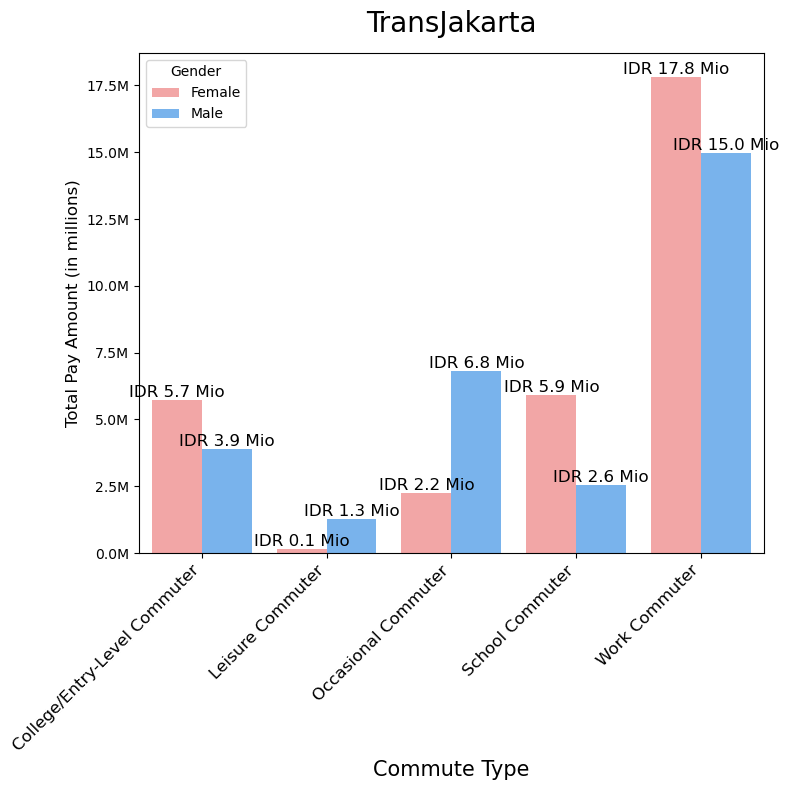

In [164]:
# Plot 1: TransJakarta
plt.figure(figsize=(8, 8))
sns.barplot(data=rev_tj, x='commute_type', y='payAmount', hue='payCardSex', palette=gender_colors)

# Add annotations for TransJakarta
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # Center of the bar
                bar.get_y() + height,  # Top of the bar
                f'IDR {height / 1_000_000:.1f} Mio',  # Label text
                ha='center',  # Horizontal alignment
                va='bottom',  # Vertical alignment
                fontsize=12
            )

plt.title('TransJakarta', fontsize=20, pad=15)
plt.ylabel('Total Pay Amount (in millions)', fontsize=12)
plt.xlabel('Commute Type', fontsize=15)
plt.legend(title='Gender', fontsize=10)
plt.xticks(rotation=45, fontsize=12, horizontalalignment='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Show plot
plt.tight_layout()
plt.show()


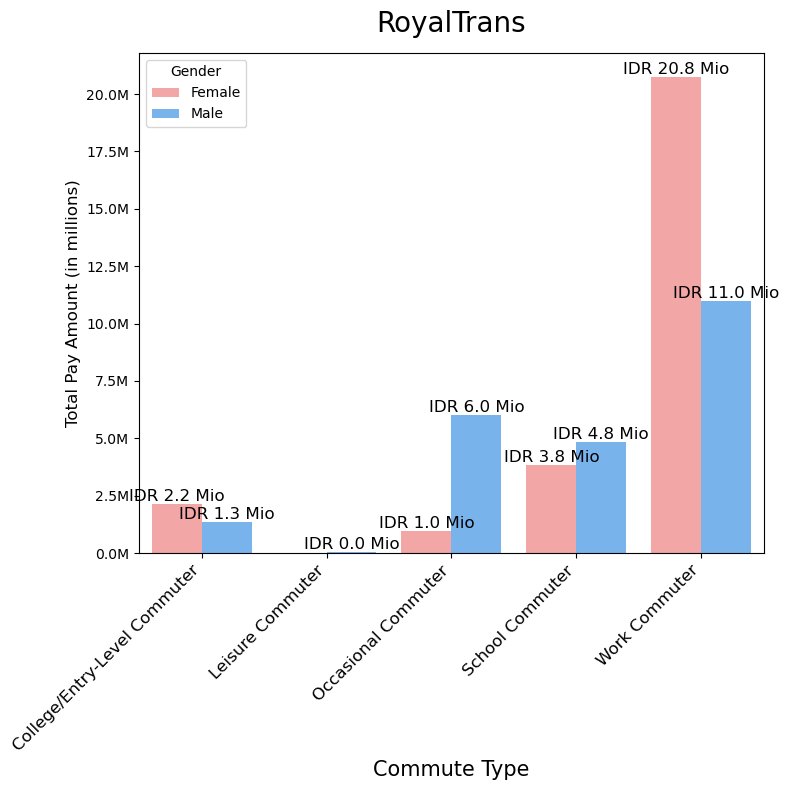

In [165]:
# Plot 2: Royal Trans
plt.figure(figsize=(8, 8))
sns.barplot(data=rev_rt, x='commute_type', y='payAmount', hue='payCardSex', palette=gender_colors)

# Add annotations for Royal Trans
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # Center of the bar
                bar.get_y() + height,  # Top of the bar
                f'IDR {height / 1_000_000:.1f} Mio',  # Label text
                ha='center',  # Horizontal alignment
                va='bottom',  # Vertical alignment
                fontsize=12
            )

plt.title('RoyalTrans', fontsize=20, pad=15)
plt.ylabel('Total Pay Amount (in millions)', fontsize=12)
plt.xlabel('Commute Type', fontsize=15)
plt.legend(title='Gender', fontsize=10)
plt.xticks(rotation=45, fontsize=12, horizontalalignment='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Show plot
plt.tight_layout()
plt.show()


In [166]:
rev_age = df.groupby(['age_group','type','payCardSex'])[['payAmount']].sum().reset_index()
rev_age['age_group']

C:\Users\User\AppData\Local\Temp\ipykernel_18544\2829273340.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



0     12–21
1     12–21
2     12–21
3     12–21
4     12–21
5     12–21
6     22–31
7     22–31
8     22–31
9     22–31
10    22–31
11    22–31
12    32–41
13    32–41
14    32–41
15    32–41
16    32–41
17    32–41
18    42–51
19    42–51
20    42–51
21    42–51
22    42–51
23    42–51
24    52–61
25    52–61
26    52–61
27    52–61
28    52–61
29    52–61
30    62–71
31    62–71
32    62–71
33    62–71
34    62–71
35    62–71
36    71-80
37    71-80
38    71-80
39    71-80
40    71-80
41    71-80
Name: age_group, dtype: category
Categories (7, object): ['12–21' < '22–31' < '32–41' < '42–51' < '52–61' < '62–71' < '71-80']

In [167]:
fig = px.treemap(rev_age, 
                 path=['age_group', 'type', 'payCardSex'], 
                 values='payAmount', 
                 title="Treemap of PayAmount by Commute Type, Bus Type, and Gender")
fig.show()

c:\Users\User\anaconda3\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



c:\Users\User\anaconda3\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\User\anaconda3\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [168]:
rev_age_pivot = df_filtered.pivot_table(index=['age_group', 'type'], 
                                                      columns='payCardSex', 
                                                      values='payAmount', 
                                                      aggfunc='sum', 
                                                      )

C:\Users\User\AppData\Local\Temp\ipykernel_18544\3045577925.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



In [169]:
rev_tj_age = rev_age[rev_age['type']=='TransJakarta']
rev_rt_age = rev_age[rev_age['type']=='RoyalTrans']

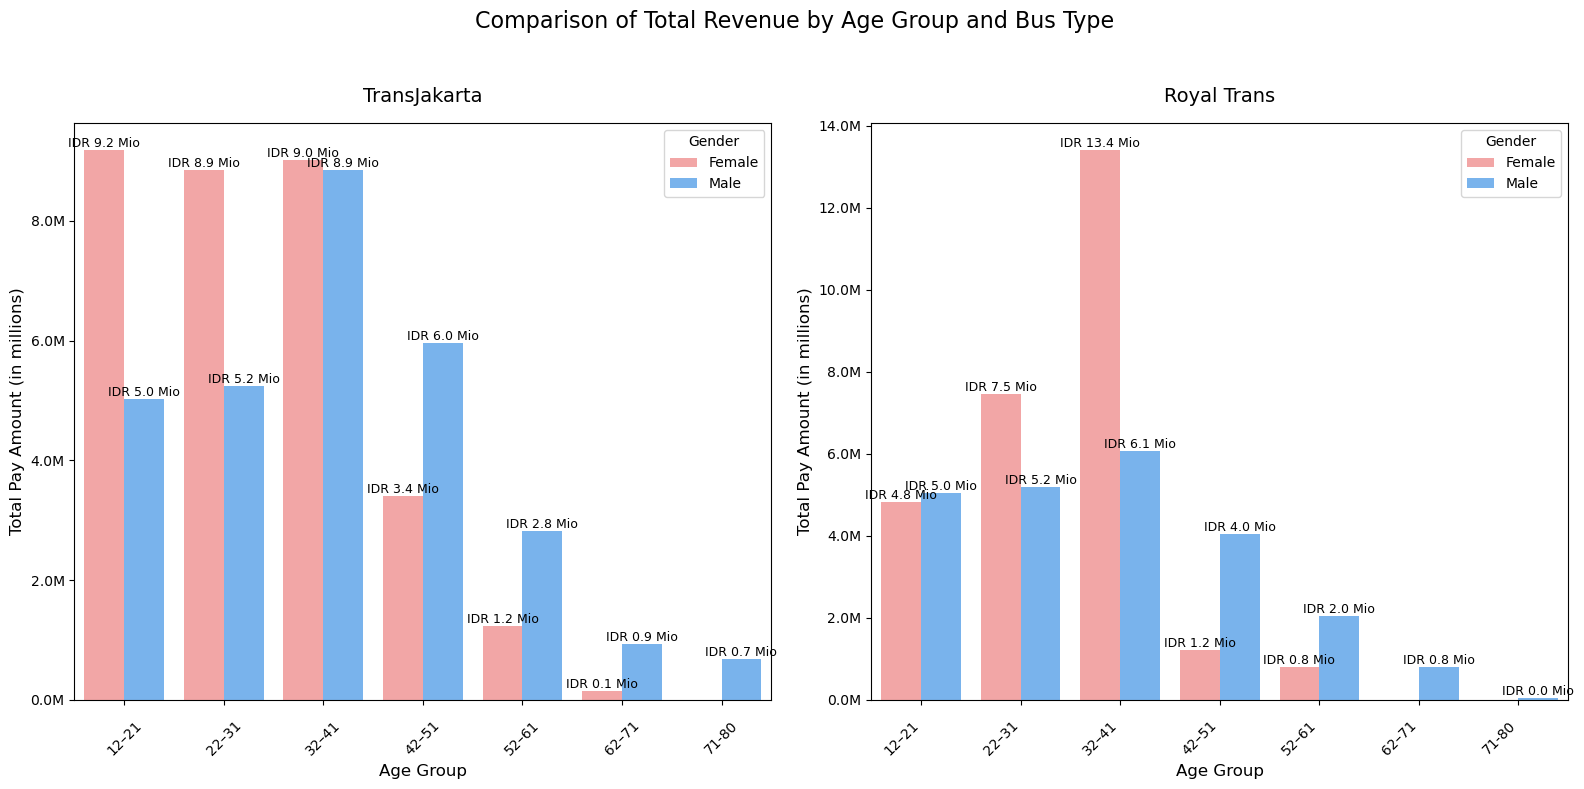

In [170]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Comparison of Total Revenue by Age Group and Bus Type', fontsize=16)
# Plot 1: TransJakarta
sns.barplot(data=rev_tj_age, x='age_group', y='payAmount', hue='payCardSex', palette=gender_colors, ax=axes[0])

# Add annotations for TransJakarta
for container in axes[0].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            axes[0].text(
                bar.get_x() + bar.get_width() / 2,  # Center of the bar
                bar.get_y() + height,  # Top of the bar
                f'IDR {height / 1_000_000:.1f} Mio',  # Label text
                ha='center',  # Horizontal alignment
                va='bottom',  # Vertical alignment
                fontsize=9
            )

axes[0].set_title('TransJakarta', fontsize=14, pad=15)
axes[0].set_ylabel('Total Pay Amount (in millions)', fontsize=12)
axes[0].set_xlabel('Age Group', fontsize=12, )
axes[0].legend(title='Gender', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
axes[0].tick_params(axis='x', rotation=45, pad=10) 
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Plot 2: Royal Trans
sns.barplot(data=rev_rt_age, x='age_group', y='payAmount', hue='payCardSex', palette=gender_colors, ax=axes[1])

# Add annotations for Royal Trans
for container in axes[1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            axes[1].text(
                bar.get_x() + bar.get_width() / 2,  # Center of the bar
                bar.get_y() + height,  # Top of the bar
                f'IDR {height / 1_000_000:.1f} Mio',  # Label text
                ha='center',  # Horizontal alignment
                va='bottom',  # Vertical alignment
                fontsize=9
            )

axes[1].set_title('Royal Trans', fontsize=14, pad=15)
axes[1].set_ylabel('Total Pay Amount (in millions)', fontsize=12)
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].legend(title='Gender', fontsize=10)
axes[1].tick_params(axis='x', rotation=45, pad=10) 
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Adjust layout
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()




#### 2. Comparison of Total Revenue by Age Group and Bus Type

TransJakarta:
- Revenue peaks in the **22–31** and **32–41** age groups:
  - Males and Females: ~IDR 8.9M–9.2M.
- Revenue declines sharply after **42–51**, dropping below IDR 3.4M.
- Minimal revenue is generated from the **71–80** age group (IDR 0.7M).
Royal Trans:
- The **32–41** age group contributes the highest revenue:
  - Females: IDR 13.4M
  - Males: IDR 6.1M
- Younger age groups (**12–21** and **22–31**) generate moderate revenue, with near-equal male and female contributions.
- Older age groups (**52–61 and above**) contribute significantly less revenue.

**Key Trend**: Both bus types show peak revenue generation from passengers in their **20s and 30s**, with a gradual decline as age increases.





Key Takeaways for Optimization
- Focus on enhancing services for **"Work Commuters"**, as they generate the most revenue.
- Create targeted marketing campaigns for younger demographics (**22–41 age group**) to maximize revenue potential.
- Explore strategies to attract more **leisure and occasional commuters**, especially females, as these categories have untapped potential.

### Implementing Segmented Pricing and Weekend Trip Promo

#### Idenifying Weekend Trip Promo Target Customers (not included subsidized bus type (JakLingko))

In [171]:
df.head(1)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,generation,commute_type,age_group,day_tapIn,week_tapIn,hour_tapIn,date_tapIn,type
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:00,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:00,3500.0,16,Gen Z,School Commuter,12–21,Monday,14,5,03,TransJakarta


In [172]:
weekend_data = df[(df['day_tapIn'].isin(['Saturday','Sunday'])) & (df['type'] != 'MikroTrans') ]

In [173]:
weekend_distribution_age = weekend_data.groupby(['payCardSex','age_group'])[['payAmount']].size().reset_index().rename(columns={0:'count'})
weekend_distribution_age

C:\Users\User\AppData\Local\Temp\ipykernel_18544\3505489310.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,payCardSex,age_group,count
0,Female,12–21,221
1,Female,22–31,333
2,Female,32–41,315
3,Female,42–51,114
4,Female,52–61,59
5,Female,62–71,5
6,Female,71-80,0
7,Male,12–21,161
8,Male,22–31,131
9,Male,32–41,210


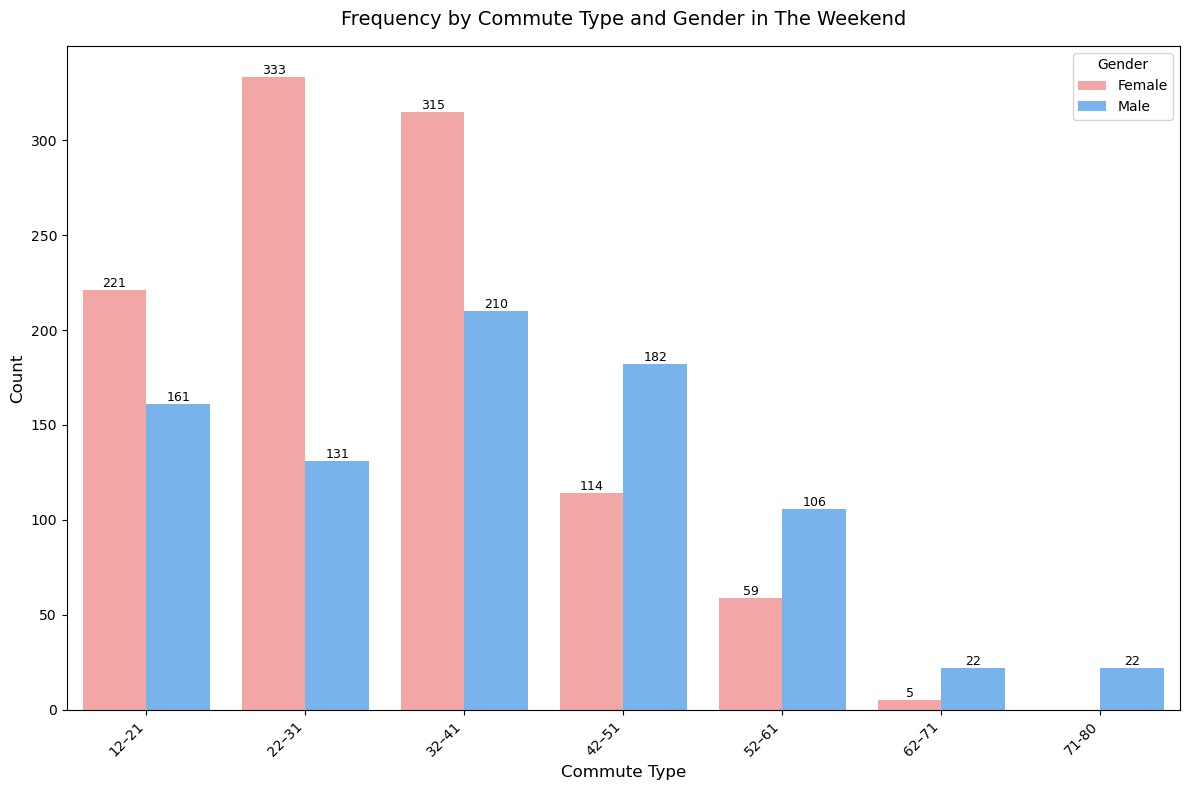

In [174]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(weekend_distribution_age, x = 'age_group', y = 'count', hue= 'payCardSex', palette= gender_colors)

# Add annotations manually
for container in ax.containers:
    # Loop through each bar and add a label
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center of the bar
                bar.get_y() + height,  # Top of the bar
                f'{int(height)}',  # Label text
                ha='center',  # Horizontal alignment
                va='bottom',  # Vertical alignment
                fontsize=9
            )

# Improve labels and title
ax.set_title('Frequency by Commute Type and Gender in The Weekend', fontsize=14, pad=15)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Commute Type', fontsize=12)
ax.legend(title='Gender', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

In [175]:
weekend_distribution_commute = weekend_data.groupby(['payCardSex','generation'])[['payAmount']].size().reset_index().rename(columns={0:'count'})
weekend_distribution_commute

,payCardSex,generation,count
0,Female,Boomers,15
1,Female,Gen X,91
2,Female,Gen Z,398
3,Female,Millennials,543
4,Male,Boomers,70
5,Male,Gen X,208
6,Male,Gen Z,228
7,Male,Millennials,328


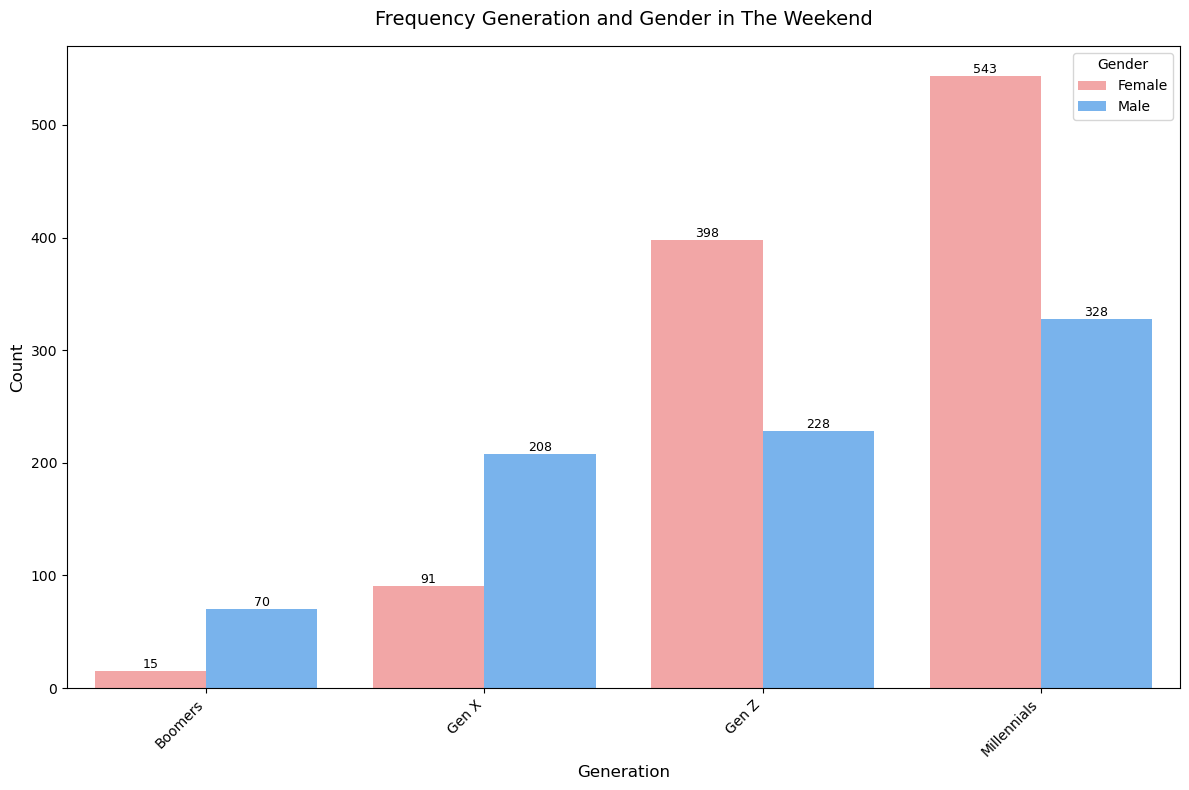

In [176]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(weekend_distribution_commute, x = 'generation', y = 'count', hue= 'payCardSex', palette= gender_colors)

# Add annotations manually
for container in ax.containers:
    # Loop through each bar and add a label
    for bar in container:
        height = bar.get_height()
        if height > 0:  
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center of the bar
                bar.get_y() + height,  # Top of the bar
                f'{int(height)}',  # Label text
                ha='center',  # Horizontal alignment
                va='bottom',  # Vertical alignment
                fontsize=9
            )

# Improve labels and title
ax.set_title('Frequency Generation and Gender in The Weekend', fontsize=14, pad=15)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Generation', fontsize=12)
ax.legend(title='Gender', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

We can target the weekend trip promo to these **Female Gen Z and Millenial**
Likely targets :
- Mothers who are looking to have a trip with their families
- Young Females who are having a days out with their signifivant other and/or friends

In [177]:
gen_z_female =  weekend_data[(weekend_data['payCardSex'] == 'Female') & (weekend_data['generation'] == 'Gen Z')]
millenial_female = weekend_data[(weekend_data['payCardSex'] == 'Female') & (weekend_data['generation'] == 'Millennials')]

In [178]:
# Number of names
len(gen_z_female['payCardID'].unique()) + len(millenial_female['payCardID'].unique()) 


404

In [179]:
# Number of transactions
gen_z_female['payCardID'].value_counts().sum() + millenial_female['payCardID'].value_counts().sum()

941

In [180]:
display(gen_z_female['payAmount'].describe())

count      398.000000
mean      5365.577889
std       5231.675088
min       3500.000000
25%       3500.000000
50%       3500.000000
75%       3500.000000
max      20000.000000
Name: payAmount, dtype: float64

In [181]:
display(millenial_female['payAmount'].describe())

count      543.000000
mean      6113.259669
std       6029.644560
min       3500.000000
25%       3500.000000
50%       3500.000000
75%       3500.000000
max      20000.000000
Name: payAmount, dtype: float64

There are 409 targets (several has multiple accounts of transactions) which lead to 941 transactions in this month

We will try to implement the promo into these routes
Here are the price we will try to implement:
- Family pack (3pax) : IDR 20,000
- Student (2pax) : IDR 15,000

This is an estimated price considering that 1 roundtrip would take IDR 7000/pax

In [182]:
# Filter by generation and Female
weekend_data.loc[
    (weekend_data['payCardSex'] == 'Female') & 
    (weekend_data['generation'] == 'Millennials'), 
    'promo'
] = 20000

C:\Users\User\AppData\Local\Temp\ipykernel_18544\3360032960.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [183]:
weekend_data.loc[
    (weekend_data['payCardSex'] == 'Female') & 
    (weekend_data['generation'] == 'Gen Z'), 
    'promo'
] = 15000

In [184]:
# See the change in targeted 
promo_df = weekend_data.groupby(['payCardID'])[['payAmount','promo']].sum()
promo_df

,payAmount,promo
payCardID,,
6.041702e+10,3500.0,0.0
6.042121e+10,23500.0,0.0
6.043882e+10,30500.0,80000.0
6.045914e+10,3500.0,0.0
6.047717e+10,3500.0,20000.0
...,...,...
4.862740e+18,7000.0,0.0
4.874770e+18,10500.0,60000.0
4.980320e+18,3500.0,0.0


In [185]:
before_promo = promo_df['payAmount'].sum()
after_promo = promo_df['promo'].sum()

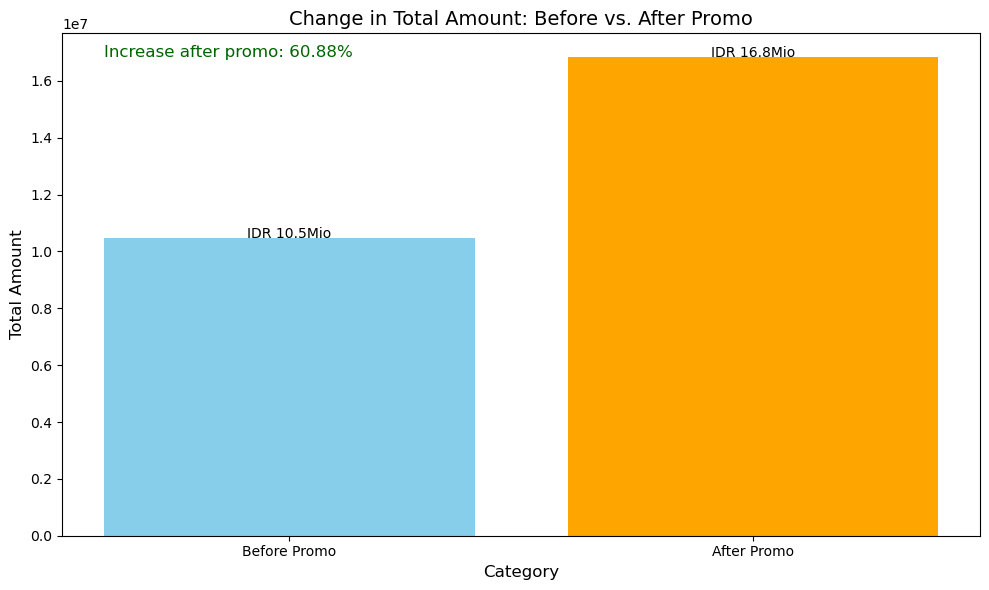

In [186]:
labels = ['Before Promo', 'After Promo']
values = [before_promo, after_promo]

# Creating the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, values, color=['skyblue', 'orange'])

# Adding labels and title
ax.set_title('Change in Total Amount: Before vs. After Promo', fontsize=14)
ax.set_ylabel('Total Amount', fontsize=12)
ax.set_xlabel('Category', fontsize=12)

# Annotating the bars with values
for i, value in enumerate(values):
    ax.text(i, value + 500,f"IDR {value/1000000:.1f}Mio", ha='center', fontsize=10)

change = (after_promo-before_promo)/before_promo
text = f'Increase after promo: {change:.2%}'
ax.text(-0.4, max(values) + 1000, text, fontsize=12, color='darkgreen')

# Show the chart 
plt.tight_layout()
plt.show()

Assuming we convert all targeted customer with 100% transaction conversion, the promo can increase the revenue by **61%**

In [192]:
top_10_weekend_route = weekend_data.groupby('corridorName').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
top_10_weekend_route


,corridorName,count
32,Kalideres - Bundaran HI via Veteran,36
49,Matraman Baru - Ancol,33
63,Pinang Ranti - Bundaran Senayan,31
64,Pinang Ranti - Pluit,30
26,Harapan Indah - ASMI,30
59,Pasar Minggu - Tanah Abang,25
40,Kampung Rambutan - Juanda via Pasar Baru,25
81,Puri Beta - Pancoran Barat,24
20,Ciputat - CSW,24
23,Dukuh Atas - Casablanca via Epicentrum Raya,23


In [193]:
top_10_weekend_route['corridorName'].unique()

array(['Kalideres - Bundaran HI via Veteran', 'Matraman Baru - Ancol',
       'Pinang Ranti - Bundaran Senayan', 'Pinang Ranti - Pluit',
       'Harapan Indah - ASMI', 'Pasar Minggu - Tanah Abang',
       'Kampung Rambutan - Juanda via Pasar Baru',
       'Puri Beta - Pancoran Barat', 'Ciputat - CSW',
       'Dukuh Atas - Casablanca via Epicentrum Raya'], dtype=object)

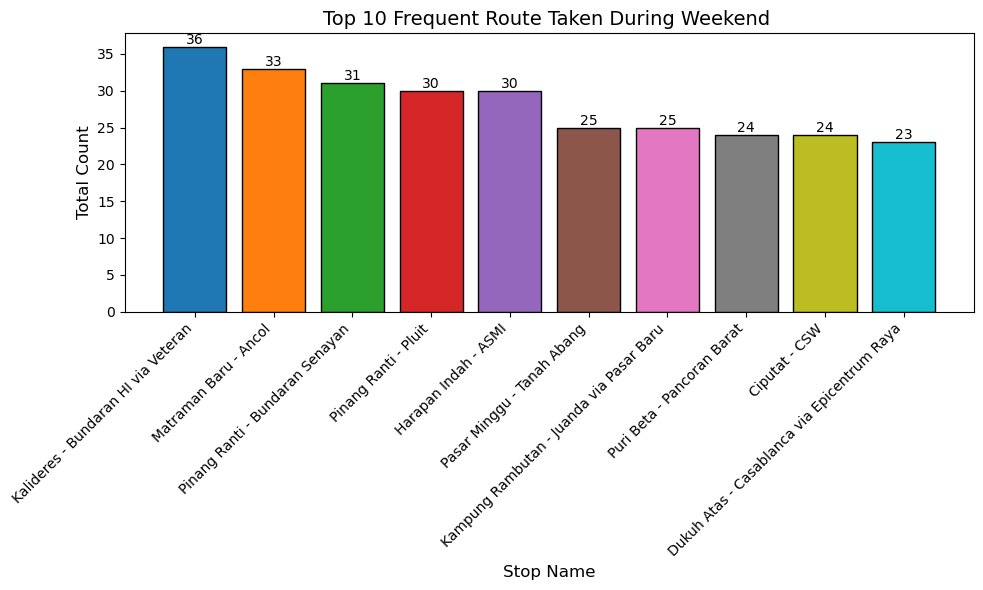

In [194]:
bar_count(top_10_weekend_route,'corridorName','count', 'Top 10 Frequent Route Taken During Weekend ')

#### Weekend Trip Promo: Before and After Analysis

To boost weekend ridership, Assuming we convert all targeted customer with 100% transaction conversion, the promo can increase the revenue by **61%**

- **Before Promo**: IDR 10.5M  
- **After Promo**: IDR 19.1M  

The weekend promo demonstrates how targeted discounts can balance utilization across different days and drive significant revenue growth.

Targeted Routes:
1. Kalideres – Bundaran HI via Veteran (36 trips)
2. Matraman Baru – Ancol (33 trips)
3. Pinang Ranti – Bundaran Senayan (31 trips)
4. Pinang Ranti – Pluit (30 trips)
5. Harapan Indah – ASMI (30 trips)
6. Pasar Minggu – Tanah Abang (25 trips)
7. Juanda via Pasar Baru (25 trips)
8. Puri Beta – Pancoran Barat (24 trips)
9. Ciputat – CSW (24 trips)
10. Dukuh Atas – Casablanca via Epicentrum Raya (23 trips)



### Implementing commuter pass

In [195]:
df['type'].unique()

array(['TransJakarta', 'RoyalTrans', 'MikroTrans'], dtype=object)

In [196]:
data_commuter = df[(df['type'] != 'MikroTrans')]

In [197]:
data_commuter_df = data_commuter[(data_commuter['commute_type'].isin(['School Commuter', 'Work Commuter', 'College/Entry-Level Commuter']))  ]
test = data_commuter.groupby(['payCardID','type'])[['payAmount']].size()
test.describe()

count    1449.000000
mean       13.854382
std        17.170301
min         1.000000
25%         1.000000
50%         2.000000
75%        38.000000
max        82.000000
dtype: float64

Since the mean of number of rides in this group higher than the median we will use the median as the threshold

In [198]:
test_df = test.reset_index(name='RideCount')

In [199]:
test_df

,payCardID,type,RideCount
0,6.040368e+10,TransJakarta,38
1,6.041702e+10,TransJakarta,1
2,6.042121e+10,RoyalTrans,1
3,6.042121e+10,TransJakarta,1
4,6.042754e+10,TransJakarta,1
...,...,...,...
1444,4.958150e+18,TransJakarta,38
1445,4.963710e+18,TransJakarta,38
1446,4.980320e+18,TransJakarta,1
1447,4.980560e+18,TransJakarta,14


In [200]:
#Getting threshold (median) to filter out people who would take the commuter pass
threshold_commuter= test.describe()['50%']
commuter_target = test_df[test_df['RideCount']>= threshold_commuter]['payCardID']
commuter_target.values


array([6.04036754e+10, 6.04388232e+10, 5.01828000e+11, 5.01828000e+11,
       5.01829000e+11, 5.01831000e+11, 5.01836000e+11, 5.01843000e+11,
       5.01899000e+11, 5.02002000e+11, 5.02010000e+11, 5.02035000e+11,
       5.02072000e+11, 5.02085000e+11, 5.02098000e+11, 5.03816000e+11,
       5.03836000e+11, 5.03838000e+11, 5.03841000e+11, 5.03842000e+11,
       5.03859000e+11, 5.03868000e+11, 5.03882000e+11, 5.60633000e+11,
       5.64771000e+11, 5.64780000e+11, 5.64804000e+11, 5.65432000e+11,
       5.66172000e+11, 5.66943000e+11, 5.67048000e+11, 5.67170000e+11,
       5.67328000e+11, 5.70918000e+11, 5.70928000e+11, 5.71549000e+11,
       5.71980000e+11, 5.72545000e+11, 5.73674000e+11, 5.73942000e+11,
       5.74887000e+11, 5.75273000e+11, 5.77159000e+11, 5.78254000e+11,
       5.79114000e+11, 5.80165000e+11, 5.84796000e+11, 5.86818000e+11,
       5.87538000e+11, 5.87888000e+11, 5.87942000e+11, 6.30413000e+11,
       6.30420000e+11, 6.30440000e+11, 6.30465000e+11, 6.30466000e+11,
      

In [201]:
target_df = data_commuter_df[data_commuter_df['payCardID'].isin(commuter_target.values)]
target_df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,generation,commute_type,age_group,day_tapIn,week_tapIn,hour_tapIn,date_tapIn,type
0,EIIW227B8L34VB,1.800630e+14,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,1,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:00,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:00,3500.0,16,Gen Z,School Commuter,12–21,Monday,14,5,03,TransJakarta
1,LGXO740D2N47GZ,4.885330e+15,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:00,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:00,3500.0,27,Gen Z,Work Commuter,22–31,Monday,14,5,03,TransJakarta
2,DJWR385V2U57TO,4.996230e+15,dki,Emong Wastuti,Female,1992,R1A,Pantai Maju - Kota,0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:00,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:00,3500.0,32,Millennials,Work Commuter,32–41,Monday,14,5,03,TransJakarta
4,VMLO535V7F95NJ,5.709280e+11,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:00,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:00,3500.0,42,Millennials,Work Commuter,42–51,Monday,14,6,03,TransJakarta
5,DDES630K2F80KC,2.251410e+15,dki,Tirta Siregar,Female,1993,1T,Cibubur - Balai Kota,0,B00127P,Benhil 3,-6.216010,106.81632,3,2023-04-03 05:08:00,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:00,20000.0,31,Millennials,Work Commuter,22–31,Monday,14,5,03,RoyalTrans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37787,WJPE009O0G78MQ,4.507200e+18,brizzi,Asirwanda Rajasa,Female,2003,3,Kalideres - Bundaran HI via Veteran,0,P00050,Dispenda Samsat Barat,-6.154634,106.73810,5,2023-04-21 21:43:00,P00208,RS Sumber Waras,-6.166294,106.79675,11.0,2023-04-21 23:13:00,3500.0,21,Gen Z,College/Entry-Level Commuter,12–21,Friday,16,21,21,TransJakarta
37811,VQQL185G1F95JD,1.800750e+14,emoney,"Cayadi Zulkarnain, S.Pd",Male,1996,12A,Pelabuhan Kaliadem - Kota,0,B02804P,Perumahan Buddha Tzu Chi 1,-6.107548,106.77192,1,2023-04-09 07:43:00,B02489P,Muara Angke,-6.110009,106.77471,3.0,2023-04-09 08:14:00,3500.0,28,Millennials,Work Commuter,22–31,Sunday,14,7,09,TransJakarta
37829,WKIT490S3J82GY,6.011020e+15,dki,dr. Indra Maryati,Male,2007,B14,Bekasi Barat - Kuningan,0,B00664P,GOR Sumantri 2,-6.221038,106.83189,11,2023-04-15 05:50:00,B02103P,Kuningan Madya 2,-6.213358,106.83027,13.0,2023-04-15 06:31:00,20000.0,17,Gen Z,School Commuter,12–21,Saturday,15,5,15,RoyalTrans
37840,NYAM952W9T30DO,1.800960e+14,emoney,"Drs. Luwar Usada, S.Sos",Female,1996,3,Kalideres - Bundaran HI via Veteran,0,P00074,Grogol 1,-6.166824,106.78971,10,2023-04-20 15:48:00,P00208,RS Sumber Waras,-6.166294,106.79675,11.0,2023-04-20 17:39:00,3500.0,28,Millennials,Work Commuter,22–31,Thursday,16,15,20,TransJakarta


In [202]:
commuter_pass_df = target_df[
(target_df['day_tapIn'] != 'Saturday') & (target_df['day_tapIn'] != 'Sunday')
]

price_commute = commuter_pass_df.groupby(['payCardID', 'type'])[['payAmount']].sum().reset_index()

In [203]:
price_commute['payAmount'].describe()

count       463.000000
mean     184965.442765
std      205076.901673
min        3500.000000
25%      129500.000000
50%      136500.000000
75%      140000.000000
max      800000.000000
Name: payAmount, dtype: float64

In [204]:
# Number of names
len(price_commute['payCardID'].unique())

453

There are 452 targets

We will determined the price by using the median of total amount they have paid this month (IDR 136,500) as a start point

We will price the commuter pass at IDR 150,000/month

We will assume that all of the targeted customer of this month will buy this commuter pass

In [205]:
pass_df = data_commuter.groupby('payCardID')[['payAmount']].sum().reset_index()

pass_df

,payCardID,payAmount
0,6.040368e+10,133000.0
1,6.041702e+10,3500.0
2,6.042121e+10,23500.0
3,6.042754e+10,3500.0
4,6.043882e+10,30500.0
...,...,...
1296,4.958150e+18,133000.0
1297,4.963710e+18,133000.0
1298,4.980320e+18,3500.0
1299,4.980560e+18,49000.0


In [206]:
pass_df['commuter_pass'] = pass_df.apply(
    lambda row: 150000 if row['payCardID'] in commuter_target.values else row['payAmount'],
    axis=1
)
pass_df

,payCardID,payAmount,commuter_pass
0,6.040368e+10,133000.0,150000.0
1,6.041702e+10,3500.0,3500.0
2,6.042121e+10,23500.0,23500.0
3,6.042754e+10,3500.0,3500.0
4,6.043882e+10,30500.0,150000.0
...,...,...,...
1296,4.958150e+18,133000.0,150000.0
1297,4.963710e+18,133000.0,150000.0
1298,4.980320e+18,3500.0,3500.0
1299,4.980560e+18,49000.0,150000.0


In [207]:
before_pass = pass_df['payAmount'].sum()
after_pass = pass_df['commuter_pass'].sum()

print(before_pass, after_pass)

112255000.0 145846500.0


In [208]:
changes_pass = (after_pass-before_pass)/before_pass

print(f'Change after introducing commuter pass: {changes_pass:.2%}')

Change after introducing commuter pass: 29.92%


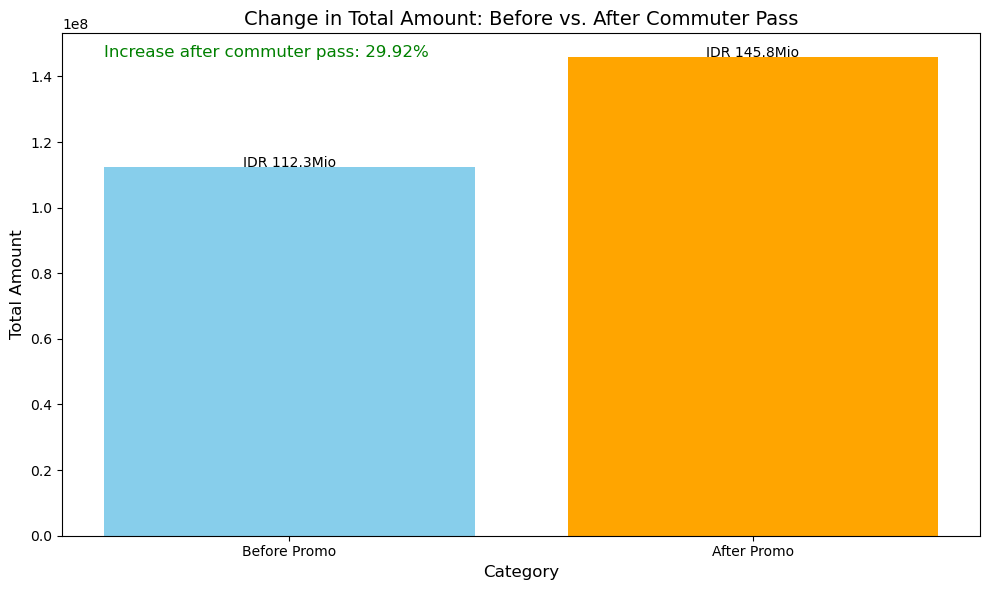

In [209]:
labels = ['Before Promo', 'After Promo']
values = [before_pass, after_pass]

# Creating the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, values, color=['skyblue', 'orange'])

# Adding labels and title
ax.set_title('Change in Total Amount: Before vs. After Commuter Pass', fontsize=14)
ax.set_ylabel('Total Amount', fontsize=12)
ax.set_xlabel('Category', fontsize=12)

# Annotating the bars with values
for i, value in enumerate(values):
    ax.text(i, value + 500,f"IDR {value/1000000:.1f}Mio", ha='center', fontsize=10)

change = (after_pass-before_pass)/before_pass
text = f'Increase after commuter pass: {change:.2%}'
ax.text(-0.4, max(values) + 1000, text, fontsize=12, color='green')

# Show the chart 
plt.tight_layout()
plt.show()

In [210]:
# finding breakeven price (452 target customer)
target_len = len(price_commute['payCardID'].unique())
price= 150000

initial_revenue = price * target_len

# Calculate the break-even revenue
break_even_revenue = before_pass

# Calculate the break-even price per product
break_even_price = break_even_revenue / target_len
break_even_price

247803.53200883002

#### Implementation of Commuter Pass and Implications

 Assuming we convert all targeted customer, the commuter pass can increase the revenue by **30%**

- **Before Pass**: IDR 112.3M  
- **After Pass**: IDR 145.8M  

 Implications:
1. **Revenue Impact**:
   - Frequent users paid less overall, reducing total revenue despite consistent ridership.
2. **Affordability and Loyalty**:
   - Benefited students and workers, fostering long-term loyalty.
3. **Opportunity for Growth**:
   - Attracted frequent users, creating potential for future upselling and tiered pricing.

The commuter pass improves accessibility but requires adjustments to balance affordability with revenue goals.


In [211]:
df.to_csv('TJ_clean_2.csv')

# **4. Conclusion and Recommendation**



## Conclusion  
The exploratory data analysis of TransJakarta underscores the system's vital role in Jakarta’s public transit network. By understanding customer demographics, ridership patterns, and revenue trends, this analysis provides actionable insights to improve the service’s efficiency and profitability. The key conclusions are summarized as follows:  

1. **Demographic Insights**: The majority of riders are working-age adults (25–44 years), with Millennials and Gen Z dominating weekend travel. Females, particularly in younger age groups, constitute a slight majority, making them a prime focus for targeted strategies.  

2. **Revenue and Ridership Trends**: Weekday ridership is consistently high, with peak periods during 5–7 AM and 3–6 PM. We can utilize this by introducing commuter pass, which can increase the revenue by 31%.  In contrast, weekend ridership drops significantly, presenting an opportunity to boost utilization through targeted promotions like the successful "all-you-can-ride" offer, which increased weekend revenue by 61%.  

3. **Operational Challenges and Opportunities**: Overcrowding at key stations and popular routes during peak hours highlights the need for resource reallocation and infrastructure improvements. 

4. **Promo Effectiveness**: The success of targeted weekend promotional campaigns, particularly among Millennials and Gen Z females, demonstrates the potential for tailored marketing strategies to drive significant ridership and revenue growth.  

By aligning services with demographic preferences, optimizing operations for peak periods, and expanding promotional efforts, TransJakarta can enhance customer satisfaction, address operational challenges, and maintain its essential role in Jakarta’s transit ecosystem.  

---

## Recommendations  
To ensure the long-term success and sustainability of TransJakarta, targeted actions are needed to address current challenges and leverage opportunities identified through data analysis. These recommendations focus on improving customer satisfaction, optimizing operations, and driving revenue growth while maintaining the system's accessibility and efficiency. Key recommendations include:  

1. **Marketing and Promotions**: Leverage social media platforms like Instagram and TikTok to connect with Millennials and Gen Z, particularly female users. Continue offering group-friendly promotions, such as family and student packages, to encourage weekend ridership. Expand the weekend promo strategy to additional routes to sustain revenue growth and address low-demand periods.  

2. **Partnerships**: Strengthen collaborations with Bank DKI and other digital payment platforms by introducing exclusive discounts, loyalty programs, or free ride incentives to encourage cashless payments and build customer loyalty.  

3. **Operational Improvements**: Allocate additional buses and resources during peak hours (5–7 AM and 3–6 PM) to accommodate increased demand. Improve station infrastructure and implement effective crowd management strategies at high-traffic stations like Garuda Taman Mini and Pejaten to ensure smooth operations.  

4. **Service Adaptation**: We can introduce commuter pass, which can increase the revenue by 31%.  Additionaly, to increase ridership in the weekend, presenting an "all-you-can-ride" offer can increased weekend revenue by 61%.
